In [1]:
from NeuralNetwork import NeuralNetwork, VGG1, FC, VGG
from Dataset import Dataset, SPIRAL, MOON, CIRCLE
from NeuroEvolution import NeuroEvolution
from tensorflow import keras
from Representation import Function, PAU
from Activation import PANGAEA_Activation, Pade_Activation_Unit
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import random


In [2]:
exp_df = pd.DataFrame(columns=['activation', 'data', 'validation', 'test', 'epoch time'])


In [3]:
exp_df = pd.DataFrame(columns=['activation', 'validation', 'test', 'training time', 'inference time'])
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
num_classes = 10
input_shape = (28, 28, 1)
#input_shape = (32, 32, 3)
mnist_dataset = Dataset(X_train, y_train, X_test, y_test, num_classes, input_shape, expand=False, label_noise=0)

input_shape = (2)

spiral_dataset = SPIRAL(10000, 1, input_shape)
circle_dataset = CIRCLE(10000, 0.02, input_shape)
moon_dataset = MOON(10000, 0.1, input_shape)

neurons = 50
layers = 20
blocks = 3

nn = FC(mnist_dataset, layers, neurons)

rep =5
loss_noise = .0
activation_noise = .0
input_noise = .0
weight_noise = .0
dropout = .0
#optimizer = tf.optimizers.Adam()
metric = keras.metrics.CategoricalAccuracy()
#metric = 'accuracy'
batch_size = len(nn.dataset.X_train)
#batch_size = 128
double_batch_on = 100
epochs = 100
patience = np.inf
verbose = 0
gradient_noise = .0
gradient_dropout = .0
drop_connect = .0
drnn = .0
weight_std = .1

callbacks = EarlyStopping(monitor='val_accuracy', patience=patience, restore_best_weights=True, verbose=0,
                          mode='max', baseline=0)


nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, callbacks, verbose=verbose)
nn.create_model()


In [8]:
import copy
w1 = copy.copy(nn.model.get_weights())
for weight in w1:
    print(weight)

[[-0.00787359 -0.20082906 -0.22664984 ...  0.0559172   0.08062038
  -0.04247103]
 [ 0.03745434 -0.09560198  0.00779856 ...  0.10973799 -0.12607642
  -0.11698311]
 [-0.08574111  0.11058412  0.04270072 ...  0.17808132  0.02129195
   0.11476196]
 ...
 [-0.07293642  0.12024906 -0.10666235 ... -0.14195468 -0.25082153
  -0.05024857]
 [-0.05127436 -0.2042721   0.0173451  ...  0.02651166 -0.03834024
   0.07150938]
 [-0.02453233  0.10843114 -0.06811563 ...  0.173348   -0.22375523
  -0.0620436 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
[[-0.01843291 -0.0215944  -0.00048974 ... -0.19430338  0.02246452
   0.07055662]
 [-0.05563011  0.21675472  0.03253148 ... -0.02546196 -0.11353119
  -0.06093266]
 [-0.14332621 -0.06615894 -0.04613105 ... -0.01571379 -0.00108258
   0.05914635]
 ...
 [ 0.10054257  0.12242301  0.05442101 ... -0.02828885 -0.09961533
  -0.08117371]
 [-0.07013234  0.09910018

In [9]:
nn.fit()

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 2.3026 - categorical_accuracy: 0.0995 - val_loss: 2.3024 - val_categorical_accuracy: 0.1050
Epoch 2/100
1/1 [==============================] - 0s 221ms/step - loss: 2.3024 - categorical_accuracy: 0.1132 - val_loss: 2.3022 - val_categorical_accuracy: 0.1050
Epoch 3/100
1/1 [==============================] - 0s 93ms/step - loss: 2.3021 - categorical_accuracy: 0.1132 - val_loss: 2.3019 - val_categorical_accuracy: 0.1050
Epoch 4/100
1/1 [==============================] - 0s 77ms/step - loss: 2.3018 - categorical_accuracy: 0.1132 - val_loss: 2.3017 - val_categorical_accuracy: 0.1050
Epoch 5/100
1/1 [==============================] - 0s 80ms/step - loss: 2.3015 - categorical_accuracy: 0.1132 - val_loss: 2.3016 - val_categorical_accuracy: 0.1050
Epoch 6/100
1/1 [==============================] - 0s 69ms/step - loss: 2.3013 - categorical_accuracy: 0.1132 - val_loss: 2.3019 - val_categorical_accuracy: 0.1050
Epoch 7/100
1/1 [

Epoch 51/100
1/1 [==============================] - 0s 74ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 52/100
1/1 [==============================] - 0s 74ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 53/100
1/1 [==============================] - 0s 77ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 54/100
1/1 [==============================] - 0s 76ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 55/100
1/1 [==============================] - 0s 75ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 56/100
1/1 [==============================] - 0s 73ms/step - loss: 2.3011 - categorical_accuracy: 0.1132 - val_loss: 2.3020 - val_categorical_accuracy: 0.1050
Epoch 57/1

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [9]:
import copy
w1 = copy.copy(nn.model.get_weights())
for weight in w1:
    print(weight)

[[-0.00498557  0.05718144  0.03614957 ...  0.0781261  -0.02399871
  -0.16017888]
 [-0.04073372  0.09443396 -0.06616342 ...  0.01958453  0.01319245
   0.08402987]
 [ 0.03306473 -0.03054331 -0.05161591 ...  0.08417173  0.0267107
  -0.1878786 ]
 ...
 [-0.02079755  0.10119455 -0.01877874 ...  0.16916351  0.07068836
  -0.00511938]
 [ 0.10925248  0.03147719  0.07210384 ... -0.0034383   0.04865979
   0.09428547]
 [ 0.05345737 -0.02469349  0.05924869 ... -0.05289383  0.02965851
  -0.12744604]]
[-0.00316092  0.00315699  0.00313842  0.00316093 -0.00316103 -0.00315602
  0.00316026  0.00313676  0.00316021 -0.00314281 -0.00316116 -0.00315879
  0.00314244 -0.0031614   0.00315169 -0.00315282 -0.00316025  0.00315746
 -0.00316031  0.00314947 -0.00315686 -0.00316178 -0.00316019 -0.00315199
  0.00316009 -0.00315734 -0.00316078  0.00316066 -0.00315863 -0.0031579
  0.00316137  0.00315988  0.00315562  0.00312339  0.00313787 -0.00315415
 -0.00315274  0.00315779  0.0031435  -0.00316142 -0.0031518   0.00315404

In [17]:
row = ['relu', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]

print(row)
    

['relu', 0.9626666903495789, 0.9513000249862671, 8.601769208908081, 0.36527228355407715]


In [55]:
print(nn.model.history.history.keys())


dict_keys([])


In [15]:
nn.model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 gaussian_noise_2 (GaussianN  (None, 2)                0         
 oise)                                                           
                                                                 
 drop_connect_2 (DropConnect  (None, 1)                3         
 )                                                               
                                                                 
 noisy_re_lu_2 (NoisyReLU)   (None, 1)                 0         
                                                                 
 dropout_2 (Dropout)         (None, 1)                 0   

In [5]:
import copy
w1 = copy.copy(nn.model.get_weights())
for weight in w1:
    print(weight)

[[-0.02962515  0.08522931]
 [-0.14616287  0.03940905]]
[0.00100003 0.00100003]
[[ 0.36687753 -1.1509365 ]
 [-0.9794067  -1.0123789 ]]
[-0.00100003 -0.00100003]


In [9]:
nn.fit()
w = copy.copy(nn.model.get_weights())


Start of epoch 0
[[[10.4499903 -2.45886278]
 [46.5244 -1.89583957]], [123.026718 0.482814789], [[-4.78348112 4.78348112]
 [-8.19310856 8.19310856]], [66.2893143 -66.2893677]]
[[[50.5346756 -120.446594]
 [-111.743881 -22.1640205]], [78.510994 30.6643696], [[166.479599 301.06543]
 [138.617 42.6781311]], [92.8754044 -2.47763062]]
Training acc: 0.5165
Validation acc: 0.5030
Time taken: 0.24s
Patience:  1


In [10]:
for weight in w:
    print(weight)

<tf.Variable 'drop_connect/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[-0.03262524,  0.0882294 ],
       [-0.14516284,  0.04040908]], dtype=float32)>
<tf.Variable 'drop_connect/bias:0' shape=(2,) dtype=float32, numpy=array([-0.00200006,  0.00200006], dtype=float32)>
<tf.Variable 'dense_1/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 0.36387748, -1.1519365 ],
       [-0.97840667, -1.013379  ]], dtype=float32)>
<tf.Variable 'dense_1/bias:0' shape=(2,) dtype=float32, numpy=array([-4.000119e-03, -9.313226e-10], dtype=float32)>


In [8]:
nn.model.optimizer.grad_after

1.0

In [18]:
tf.cast(tf.random.uniform(shape=(10,1)) > 0.9, dtype=tf.float32)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]], dtype=float32)>

In [4]:
from Swarm import Star, Swarm
import numpy as np
np.set_printoptions(suppress=True)

nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, callbacks, verbose=verbose)

loss_noise = 0.0
activation_noise = 0.0
input_noise = 0.0
gradient_noise = 0.0
weight_noise = 0.0
gradient_dropout = .0
dropout = 0.0
drop_connect = 0.0
batch_size = len(nn.dataset.X_train)
double_batch_on = np.inf
drnn = 0.0

bounds = [[0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 0.99], [0.0, 0.99], [0.0, 0.99], [1024, len(nn.dataset.X_train)], [1, 100], [0., 1.]]
population_size = 20
ind_size = 11
options = {'c1': 1.49618, 'c2': 1.49618, 'w': 0.7298, 'k': population_size, 'p': 2}
star = Star(population_size)
swarm = Swarm(star, population_size, ind_size, options, bounds, 0.2, bounded=True)

for i in range(population_size):
    choice = np.random.choice([0,1,2,3,4,5,6,7], 2)
    for j in range(ind_size):
        if j not in choice and j != 8 and j !=9 and j !=10:
            swarm.position[i][j] = bounds[j][0]

ost, pos, time_found = swarm.optimize(nn, steps=10, no_change=np.inf, verbose=1)


loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.7134730229601053 , weight_noise: 0.722538485145623 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 14406 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 69 , drnn: 0 , weight_std: 0.20546951652098056
0.10450000315904617 0.10100000351667404

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.6056355084364154 , weight_noise: 0.22939841623167234 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 6685 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 64 , drnn: 0 , weight_std: 0.8459748287890356
0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5438646503683903 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 23402 , dropout: 0.0 , drop_connect: 0.27170615819138527 , double_batch_on: 61 , drnn: 0 , weight_std: 0.2766966514274559
0.10516666620969772 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.373333466562

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.8015000224113464 0.7897999882698059

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.2906288789673198 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 37180 , dropout: 0.07888453897277437 , drop_connect: 0.0 , double_batch_on: 48 , drnn: 0 , weight_std: 0.871516594165809
0.10316666960716248 0.10029999911785126

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.6987350194389705 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 30475 , dropout: 0.41493116694280546 , drop_connect: 0.0 , double_batch_on: 42 , drnn: 0 , weight_std: 0.46874550780997537
0.09983333200216293 0.10300000011920929

loss_noise: 0.269004031094101 , activation_noise: 0.6287924989143013 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 15734 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 77 , drnn: 0 , weight_std: 0.12589034261856968
0.10499999672174454 0.11349999904632568

loss_noise:

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.6870775028266 , batch_size: 1137 , dropout: 0.0 , drop_connect: 0.7617348382235697 , double_batch_on: 67 , drnn: 0 , weight_std: 0.8168414430119448
0.0976666659116745 0.10100000351667404

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5999318709042396 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 19654 , dropout: 0.49885510395047217 , drop_connect: 0.0 , double_batch_on: 5 , drnn: 0 , weight_std: 0.5745600118345714


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.09866666793823242 0.10289999842643738

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.8189720905879312 , gradient_noise: 0.5955274351707481 , batch_size: 49130 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 81 , drnn: 0 , weight_std: 0.04397691494131828
0.11133333295583725 0.10279999673366547

loss_noise: 0.8331330801040027 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 3552 , dropout: 0.3018610495928203 , drop_connect: 0.0 , double_batch_on: 55 , drnn: 0 , weight_std: 0.9640631613150896
0.10649999976158142 0.10450000315904617

loss_noise: 0.19089717320446464 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.5943766932435816 , gradient_noise: 0.0 , batch_size: 8489 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 59 , drnn: 0 , weight_std: 0.544510811425071
0.11433333158493042 0.10490000247955322

loss_noise: 

0.09950000047683716 0.09740000218153

loss_noise: 0.0 , activation_noise: 0.31687231919852027 , input_noise: 0.35803108037959797 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 27876 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 24 , drnn: 0 , weight_std: 0.5323618210179489
0.10316666960716248 0.09759999811649323

loss_noise: 0.0 , activation_noise: 0.22769795660900938 , input_noise: 0.4981200165768659 , weight_noise: 0.06846967984857691 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 25910 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 22 , drnn: 0 , weight_std: 0.23073826047972096
0.11683333665132523 0.12380000203847885

loss_noise: 0.025666000428460047 , activation_noise: 0.09609872808105724 , input_noise: 0.20476951566871252 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.03316884115822032 , batch_size: 28435 , dropout: 0.11122498471733955 , drop_connect: 0.0 , double_batch_on: 38 , drnn: 0 , weight_std: 0.4

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.8006666898727417 0.7723000049591064

loss_noise: 0.0 , activation_noise: 0.26906501240869557 , input_noise: 0.20719869454277634 , weight_noise: 0.0047575603210094335 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33068 , dropout: 0.0 , drop_connect: 0.04133530082688988 , double_batch_on: 8 , drnn: 0 , weight_std: 0.4784707640789104
0.1041666641831398 0.10909999907016754

loss_noise: 0.021818558025976875 , activation_noise: 0.24002196643379087 , input_noise: 0.43859794255668405 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33072 , dropout: 0.018931166942805444 , drop_connect: 0.0 , double_batch_on: 3 , drnn: 0 , weight_std: 0.10287341107839015
0.10499999672174454 0.11349999904632568

loss_noise: 0.006352359563713328 , activation_noise: 0.4992337829069737 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 25972 , dropout: 0.08776251933018023 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.1068333312869072 0.10209999978542328

loss_noise: 0.09602624568779966 , activation_noise: 0.3968744449320105 , input_noise: 0.4626468583646716 , weight_noise: 0.0 , gradient_dropout: 0.02349960932477828 , gradient_noise: 0.016826407880852573 , batch_size: 34682 , dropout: 0.05595665436317928 , drop_connect: 0.03570360781014127 , double_batch_on: 37 , drnn: 0 , weight_std: 0.2857349222471435
0.09950000047683716 0.10209999978542328

loss_noise: 0.0 , activation_noise: 0.15397915306811427 , input_noise: 0.19489879349992995 , weight_noise: 0.1315945905853122 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 36864 , dropout: 0.30728859147234017 , drop_connect: 0.0 , double_batch_on: 21 , drnn: 0 , weight_std: 0.32909088440367784
0.09600000083446503 0.10090000182390213

loss_noise: 0.22425263215244928 , activation_noise: 0.37813097142151053 , input_noise: 0.3404411905691723 , weight_noise: 0.007603433252350637 , gradient_dropout: 0.0 , gradient_noise: 0.28707750282659994 , batch_

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.07150066114302936 , activation_noise: 0.28527575247425885 , input_noise: 0.2 , weight_noise: 0.09993837426039995 , gradient_dropout: 0.4663099301449414 , gradient_noise: 0.1955274351707481 , batch_size: 33830 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 44 , drnn: 0 , weight_std: 0.20693901710624155
0.09799999743700027 0.09799999743700027

loss_noise: 0.4331330801040027 , activation_noise: 0.2 , input_noise: 0.3378555514234902 , weight_noise: 0.0 , gradient_dropout: 0.018259960801079937 , gradient_noise: 0.0 , batch_size: 10094 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 29 , drnn: 0 , weight_std: 0.5640631613150897
0.10183333605527878 0.10859999805688858

loss_noise: 0.0 , activation_noise: 0.4 , input_noise: 0.09574989075739435 , weight_noise: 0.0 , gradient_dropout: 0.43944556981212657 , gradient_noise: 0.001367219067554784 , batch_size: 29680 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 19 , drnn: 0 

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.09950000047683716 0.09740000218153

loss_noise: 0.004175233187581437 , activation_noise: 0.29609872808105725 , input_noise: 0.12310220836596414 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 29344 , dropout: 0.05937607019952691 , drop_connect: 0.0 , double_batch_on: 18 , drnn: 0 , weight_std: 0.2347514914490788
0.10499999672174454 0.11349999904632568

loss_noise: 0.08827330172121023 , activation_noise: 0.2506335446711316 , input_noise: 0.061405219052947435 , weight_noise: 0.6664518868602144 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 41050 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 24 , drnn: 0 , weight_std: 0.7858812901251915
0.09600000083446503 0.10090000182390213

loss_noise: 0.0 , activation_noise: 0.08396322710502611 , input_noise: 0.36464191031127396 , weight_noise: 0.0605606161731575 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 35702 , dropout: 0.14926155155408272 , drop_connect: 0.0 , double_batch_on: 

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.17483332753181458 0.181099995970726

loss_noise: 0.0 , activation_noise: 0.4034623045668372 , input_noise: 0.07284751623163954 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32394 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.2784707640789104


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.24583333730697632 0.23280000686645508

loss_noise: 0.0 , activation_noise: 0.38185374281751044 , input_noise: 0.36598736264162374 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 31474 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.0


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.20635235956371334 , activation_noise: 0.5128458431102139 , input_noise: 0.15507159122695224 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 30725 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 25 , drnn: 0 , weight_std: 0.146743691009377


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.656166672706604 0.6510000228881836

loss_noise: 0.0 , activation_noise: 0.34370676551788226 , input_noise: 0.36513050417903437 , weight_noise: 0.0 , gradient_dropout: 0.041025067048120784 , gradient_noise: 0.2582747175358081 , batch_size: 19334 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.24045490065263234


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10533333569765091 0.10490000247955322

loss_noise: 0.03567815283805041 , activation_noise: 0.36013022489872504 , input_noise: 0.2759160560471214 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 37607 , dropout: 0.03584403724677489 , drop_connect: 0.0 , double_batch_on: 17 , drnn: 0 , weight_std: 0.15895300942774473
0.6006666421890259 0.5866000056266785

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.3315945905853122 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 26268 , dropout: 0.18517940642753317 , drop_connect: 0.0 , double_batch_on: 12 , drnn: 0 , weight_std: 0.5290908844036779
0.09950000047683716 0.09740000218153

loss_noise: 0.02425263215244927 , activation_noise: 0.3589022635279837 , input_noise: 0.24465229216768597 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.08707750282659993 , batch_size: 29657 , dropout: 0.0 , drop_connect: 0.1677348382235696 , double_batch_on: 10 , drnn: 0 , weigh

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.09483333677053452 0.08959999680519104

loss_noise: 0.0 , activation_noise: 0.16781883939108563 , input_noise: 0.16600916124114104 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 39751 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.07036142165389808


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.08527575247425884 , input_noise: 0.27744260098400386 , weight_noise: 0.0 , gradient_dropout: 0.26830993014494137 , gradient_noise: 0.3253137398908378 , batch_size: 34446 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 38 , drnn: 0 , weight_std: 0.006939017106241535
0.09600000083446503 0.10090000182390213

loss_noise: 0.2418429679691517 , activation_noise: 0.3112214849869965 , input_noise: 0.15955924651028952 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 20689 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 10 , drnn: 0 , weight_std: 0.6230968617115289


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.11500000208616257 0.1177000030875206

loss_noise: 0.07314182218666067 , activation_noise: 0.2 , input_noise: 0.11636143894430381 , weight_noise: 0.0 , gradient_dropout: 0.24144556981212656 , gradient_noise: 0.0 , batch_size: 22339 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 21 , drnn: 0 , weight_std: 0.47860302699470614
0.11433333158493042 0.10920000076293945
Best Particle =  0.8015 , Step =  3

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.5798053542890642 , weight_noise: 0.3574676067019123 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32546 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 32 , drnn: 0 , weight_std: 0.2480776572769678
0.09950000047683716 0.09740000218153

loss_noise: 0.0 , activation_noise: 0.19580012361937224 , input_noise: 0.4587381960514138 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 35890 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0 , weight_std: 0.1323618210179489
0

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10000000149011612 0.10320000350475311

loss_noise: 0.0 , activation_noise: 0.39324311886197005 , input_noise: 0.08243727563357109 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33083 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.037347596628538676


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.28827330172121024 , activation_noise: 0.21712134885962395 , input_noise: 0.0413024683629528 , weight_noise: 0.4664518868602144 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 51646 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 22 , drnn: 0 , weight_std: 0.8617790968255934
0.09600000083446503 0.10090000182390213

loss_noise: 0.0 , activation_noise: 0.2145471807505499 , input_noise: 0.16464191031127395 , weight_noise: 0.2605606161731575 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 35674 , dropout: 0.3472615515540827 , drop_connect: 0.0 , double_batch_on: 32 , drnn: 0 , weight_std: 0.7577282363360227
0.10000000149011612 0.10320000350475311

loss_noise: 0.5366188945498259 , activation_noise: 0.5394866267587675 , input_noise: 0.08359929549087519 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32510 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 25 , drnn: 0 , weig

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.140666663646698 0.1363999992609024

loss_noise: 0.0 , activation_noise: 0.22386195471118836 , input_noise: 0.05967213311332448 , weight_noise: 0.0 , gradient_dropout: 0.3205032802208027 , gradient_noise: 0.0 , batch_size: 43201 , dropout: 0.0 , drop_connect: 0.3109226543618844 , double_batch_on: 51 , drnn: 0 , weight_std: 0.20192880747778957
0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.2586748732348162 , input_noise: 0.2530502593041192 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 34171 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0 , weight_std: 0.33533662404366854


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.12666666507720947 0.12200000137090683

loss_noise: 0.0 , activation_noise: 0.33032024153054584 , input_noise: 0.058561920942906465 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32518 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.0784707640789104


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.18185374281751043 , input_noise: 0.3264536591479284 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33211 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.13016042091576596


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.273333340883255 0.2687999904155731

loss_noise: 0.04458102109147857 , activation_noise: 0.3277223347156205 , input_noise: 0.2783376831353621 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 34213 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 5 , drnn: 0 , weight_std: 0.14527049384544954


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.5256666541099548 0.5087000131607056

loss_noise: 0.0 , activation_noise: 0.3593835923871046 , input_noise: 0.16681933770009572 , weight_noise: 0.0 , gradient_dropout: 0.08552063182772032 , gradient_noise: 0.058274717535808096 , batch_size: 25213 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.19325080510654113


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.14650000631809235 0.1437000036239624

loss_noise: 0.0 , activation_noise: 0.2029178916591513 , input_noise: 0.13482105039232756 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 35328 , dropout: 0.010699747998223444 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.09816485994557109


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.02675676972660851 , input_noise: 0.14759518584722678 , weight_noise: 0.5315945905853122 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 23206 , dropout: 0.18634076376206232 , drop_connect: 0.0 , double_batch_on: 32 , drnn: 0 , weight_std: 0.3290908844036779
0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.19869671975470563 , input_noise: 0.06488845409140229 , weight_noise: 0.014625454709681927 , gradient_dropout: 0.0 , gradient_noise: 0.28707750282659994 , batch_size: 38018 , dropout: 0.011103033440825028 , drop_connect: 0.20472945425364114 , double_batch_on: 30 , drnn: 0 , weight_std: 0.4629650772150077
0.09816666692495346 0.1071000024676323

loss_noise: 0.0 , activation_noise: 0.13708822673171436 , input_noise: 0.3500097320585588 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.015979656332525405 , batch_size: 36319 , dropout: 0.0 , drop_connect: 0.0

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.11304544604906314 , input_noise: 0.07744260098400385 , weight_noise: 0.0 , gradient_dropout: 0.32090653145177406 , gradient_noise: 0.5253137398908378 , batch_size: 45041 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 33 , drnn: 0 , weight_std: 0.0
0.10000000149011612 0.10320000350475311

loss_noise: 0.08627212613481386 , activation_noise: 0.31448898654775526 , input_noise: 0.10023742954764404 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 31284 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.5383426647688538


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.12966667115688324 0.13249999284744263

loss_noise: 0.22960216227227437 , activation_noise: 0.0 , input_noise: 0.2030477962039035 , weight_noise: 0.0 , gradient_dropout: 0.054955172764055676 , gradient_noise: 0.0 , batch_size: 18653 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 41 , drnn: 0 , weight_std: 0.3664955502271151
0.1483333259820938 0.14920000731945038
Best Particle =  0.8015 , Step =  4

loss_noise: 0.0 , activation_noise: 0.07494356474013275 , input_noise: 0.7798053542890642 , weight_noise: 0.1574676067019123 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 21950 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0 , weight_std: 0.1612464296446483
0.10450000315904617 0.10100000351667404

loss_noise: 0.0 , activation_noise: 0.19450804044670328 , input_noise: 0.35328841560391505 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 35677 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.23529213867929516 , input_noise: 0.43714545664496346 , weight_noise: 0.025260250454473082 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 23791 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0 , weight_std: 0.19640237651900455


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.09883332997560501 0.09759999811649323

loss_noise: 0.0 , activation_noise: 0.370921399441423 , input_noise: 0.2812586948202086 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32528 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.034874817747595786


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.4618789724757022 , activation_noise: 0.1034344686501953 , input_noise: 0.211739793539504 , weight_noise: 0.6664518868602144 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 41050 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 42 , drnn: 0 , weight_std: 0.6617790968255934
0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.1687080311746974 , input_noise: 0.0 , weight_noise: 0.4605606161731575 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33037 , dropout: 0.5262236727536651 , drop_connect: 0.0 , double_batch_on: 37 , drnn: 0 , weight_std: 0.6440897836711926
0.10450000315904617 0.10100000351667404

loss_noise: 0.3366188945498259 , activation_noise: 0.33948662675876745 , input_noise: 0.11198458222271812 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 30135 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 10 , drnn: 0 , weight_std: 0.31032227

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.14216665923595428 0.1454000025987625

loss_noise: 0.0 , activation_noise: 0.02386195471118835 , input_noise: 0.10506055754501598 , weight_noise: 0.0 , gradient_dropout: 0.5185032802208027 , gradient_noise: 0.0 , batch_size: 34852 , dropout: 0.0 , drop_connect: 0.35059124696750776 , double_batch_on: 31 , drnn: 0 , weight_std: 0.11639173845224682
0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.25856708258906946 , input_noise: 0.19639795508434957 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32055 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 2 , drnn: 0 , weight_std: 0.16199370530975463


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.6866666674613953 0.6608999967575073

loss_noise: 0.0 , activation_noise: 0.23368215307336293 , input_noise: 0.2585619209429065 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 32736 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.16182531683705598


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.7285000085830688 0.7178000211715698

loss_noise: 0.0 , activation_noise: 0.13662994344310886 , input_noise: 0.22922393240875505 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 34270 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.29932084917195023


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.1850000023841858 0.19820000231266022

loss_noise: 0.10684758511513855 , activation_noise: 0.36250689397625463 , input_noise: 0.20608193227034466 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33270 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0 , weight_std: 0.18588647883208143
0.7398333549499512 0.7350000143051147

loss_noise: 0.0 , activation_noise: 0.29354180052137135 , input_noise: 0.1234668248981126 , weight_noise: 0.0 , gradient_dropout: 0.08143349935267903 , gradient_noise: 0.0 , batch_size: 32770 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.15936570417386978


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.7976666688919067 0.7915999889373779

loss_noise: 0.0 , activation_noise: 0.30251359222021806 , input_noise: 0.248520238654519 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 31354 , dropout: 0.007044547513199707 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.18721145864169353


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.6215000152587891 0.6270999908447266

loss_noise: 0.0 , activation_noise: 0.1967582882856193 , input_noise: 0.21751266177168294 , weight_noise: 0.4219435198174081 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 24473 , dropout: 0.38434076376206233 , drop_connect: 0.0 , double_batch_on: 52 , drnn: 0 , weight_std: 0.13896053777527462
0.11133333295583725 0.10279999673366547

loss_noise: 0.00014564589008501938 , activation_noise: 0.14671494205696278 , input_noise: 0.04707591823525329 , weight_noise: 0.023639809710066358 , gradient_dropout: 0.0 , gradient_noise: 0.48707750282659995 , batch_size: 27423 , dropout: 0.05241605316951088 , drop_connect: 0.40272945425364115 , double_batch_on: 18 , drnn: 0 , weight_std: 0.4613094245566879
0.09883332997560501 0.0989999994635582

loss_noise: 0.0 , activation_noise: 0.10370938208562676 , input_noise: 0.45546942468194374 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.013845245022866708 , batch_size: 36567 , dropout: 0.0 , 

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0 , activation_noise: 0.1363783506943244 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.518906531451774 , gradient_noise: 0.32531373989083784 , batch_size: 51220 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 13 , drnn: 0 , weight_std: 0.12386567268145639
0.10450000315904617 0.10100000351667404

loss_noise: 0.0 , activation_noise: 0.24554619740444028 , input_noise: 0.23606385851434908 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 39329 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 1 , drnn: 0 , weight_std: 0.33834266476885383


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10883333534002304 0.11640000343322754

loss_noise: 0.32294561274405553 , activation_noise: 0.0 , input_noise: 0.298493891838086 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 29249 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0 , weight_std: 0.1874946540262725
0.9491666555404663 0.9366000294685364
Best Particle =  0.9492 , Step =  5

loss_noise: 0.2 , activation_noise: 0.0 , input_noise: 0.5798053542890642 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 11355 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 34 , drnn: 0 , weight_std: 0.1897146581318177
0.9571666717529297 0.944599986076355

loss_noise: 0.07828340819116464 , activation_noise: 0.1153335051181258 , input_noise: 0.378976625367263 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 33385 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 13 , drnn: 0 , weight_std: 0.13792212959333094
0.5743333101272583 0

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.09650000184774399 0.10119999945163727

loss_noise: 0.4610882818156978 , activation_noise: 0.0 , input_noise: 0.411739793539504 , weight_noise: 0.8664518868602145 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 30455 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 62 , drnn: 0 , weight_std: 0.4617790968255934
0.10499999672174454 0.11349999904632568

loss_noise: 0.19164140735221208 , activation_noise: 0.0 , input_noise: 0.2 , weight_noise: 0.6605606161731575 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22441 , dropout: 0.3282236727536651 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0 , weight_std: 0.4440897836711926
0.10499999672174454 0.11349999904632568

loss_noise: 0.1366188945498259 , activation_noise: 0.13948662675876744 , input_noise: 0.31198458222271813 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22406 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 25 , drnn: 0 , weight_std: 0.11032227202072176


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.0212561137239708 , activation_noise: 0.0 , input_noise: 0.17087491159182772 , weight_noise: 0.0 , gradient_dropout: 0.4035893044469364 , gradient_noise: 0.0 , batch_size: 24257 , dropout: 0.0 , drop_connect: 0.3992223699446831 , double_batch_on: 25 , drnn: 0 , weight_std: 0.15662503545619133


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.10499999672174454 0.11349999904632568

loss_noise: 0.2 , activation_noise: 0.05856708258906945 , input_noise: 0.3963979550843496 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 27360 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 22 , drnn: 0 , weight_std: 0.08990513778705807
0.10499999672174454 0.11349999904632568

loss_noise: 0.17139226047925807 , activation_noise: 0.11950521176043916 , input_noise: 0.4585619209429065 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22141 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 6 , drnn: 0 , weight_std: 0.2307489049168916
0.6478333473205566 0.6137999892234802

loss_noise: 0.2 , activation_noise: 0.07481401465754248 , input_noise: 0.42922393240875506 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 23674 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0 , weight_std: 0.15361166683187916


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.7706666588783264 0.7555000185966492

loss_noise: 0.2847053978164485 , activation_noise: 0.31572296208404255 , input_noise: 0.40608193227034467 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 30385 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 34 , drnn: 0 , weight_std: 0.2165008226561761
0.7568333148956299 0.7523999810218811

loss_noise: 0.2 , activation_noise: 0.09354180052137134 , input_noise: 0.3234668248981126 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22175 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0 , weight_std: 0.15897455095180932


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.8105000257492065 0.792900025844574

loss_noise: 0.2 , activation_noise: 0.16747631016524717 , input_noise: 0.448520238654519 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 25848 , dropout: 0.0012906145911705117 , drop_connect: 0.0 , double_batch_on: 20 , drnn: 0 , weight_std: 0.2536458169227996


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.3474999964237213 0.34689998626708984

loss_noise: 0.08144680293311667 , activation_noise: 0.11868149470697441 , input_noise: 0.30084004331556585 , weight_noise: 0.254796044434054 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 23551 , dropout: 0.20391498822102352 , drop_connect: 0.0 , double_batch_on: 61 , drnn: 0 , weight_std: 0.04607217388760057
0.10499999672174454 0.11349999904632568

loss_noise: 0.20014564589008504 , activation_noise: 0.0 , input_noise: 0.2470759182352533 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.28707750282659994 , batch_size: 16828 , dropout: 0.05126209930375163 , drop_connect: 0.5334786804973757 , double_batch_on: 38 , drnn: 0 , weight_std: 0.36060954820381275
0.10333333164453506 0.09700000286102295

loss_noise: 0.19984608017499558 , activation_noise: 0.0 , input_noise: 0.6500563473460248 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.012081513720592064 , batch_size: 25972 , dropout: 0.0003058661092504786 , dr

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.12783333659172058 0.12200000137090683

loss_noise: 0.2739485777582578 , activation_noise: 0.0 , input_noise: 0.3932775758270022 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 18653 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 48 , drnn: 0 , weight_std: 0.05717399703667614
0.10499999672174454 0.11349999904632568
Best Particle =  0.9572 , Step =  6

loss_noise: 0.34596000000000005 , activation_noise: 0.0 , input_noise: 0.43384535428906423 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 3623 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 48 , drnn: 0 , weight_std: 0.21049077128175392
0.965833306312561 0.9546999931335449

loss_noise: 0.2455727889437523 , activation_noise: 0.0 , input_noise: 0.45043316270685363 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22790 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 32 , drnn: 0 , weight_std: 0.2499134614080375
0.5821666717529

0.10499999672174454 0.11349999904632568

loss_noise: 0.4626567173528088 , activation_noise: 0.0 , input_noise: 0.12414407051914433 , weight_noise: 0.4664518868602145 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 18465 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 64 , drnn: 0 , weight_std: 0.4617790968255934
0.10499999672174454 0.11349999904632568

loss_noise: 0.5122403421004718 , activation_noise: 0.0 , input_noise: 0.46093435630107094 , weight_noise: 0.4805868555280601 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 22441 , dropout: 0.3282236727536651 , drop_connect: 0.0 , double_batch_on: 73 , drnn: 0 , weight_std: 0.644668615130827
0.10499999672174454 0.11349999904632568

loss_noise: 0.4760399126759522 , activation_noise: 0.035868381337627986 , input_noise: 0.20262045601178263 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 6660 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 25 , drnn: 0 , weight_std: 0.260001

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.7868333458900452 0.7484999895095825

loss_noise: 0.22434086818180607 , activation_noise: 0.0 , input_noise: 0.07389491664597053 , weight_noise: 0.0 , gradient_dropout: 0.32815431377132803 , gradient_noise: 0.0 , batch_size: 20039 , dropout: 0.0 , drop_connect: 0.17904864464319925 , double_batch_on: 65 , drnn: 0 , weight_std: 0.2777897892226777
0.12816666066646576 0.13590000569820404

loss_noise: 0.2 , activation_noise: 0.2 , input_noise: 0.24177164715676808 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 10507 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 58 , drnn: 0 , weight_std: 0.30177733770705206
0.09950000047683716 0.10279999673366547

loss_noise: 0.5544992304246845 , activation_noise: 0.0 , input_noise: 0.18278693562696383 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0 , weight_std: 0.20332509817183167
0.9803333282470703 0.97490000724

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.2423333376646042 0.25870001316070557

loss_noise: 0.596723965465483 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.4565609426919194 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 16479 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0 , weight_std: 0.2617790968255934
0.10450000315904617 0.10100000351667404

loss_noise: 0.6690720939716546 , activation_noise: 0.0 , input_noise: 0.2609343563010709 , weight_noise: 0.28058685552806006 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 14966 , dropout: 0.5262236727536651 , drop_connect: 0.0 , double_batch_on: 53 , drnn: 0 , weight_std: 0.6164250875719557
0.10499999672174454 0.11349999904632568

loss_noise: 0.63887888859493 , activation_noise: 0.0 , input_noise: 0.07848634086697903 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 14 , drnn: 0 , weight_std: 0.32499978320836254
0.34299999475479126 0.34

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.937166690826416 0.9229999780654907

loss_noise: 0.7306754990318622 , activation_noise: 0.0 , input_noise: 0.20426685129245808 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 53 , drnn: 0 , weight_std: 0.19282927225355054
0.9808333516120911 0.9757000207901001

loss_noise: 0.770263679270583 , activation_noise: 0.0 , input_noise: 0.44372522249820495 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 69 , drnn: 0 , weight_std: 0.21615935988002424
0.9741666913032532 0.9650999903678894

loss_noise: 0.49808526315235413 , activation_noise: 0.0 , input_noise: 0.00819402879137171 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 6432 , dropout: 0.0064102252599090885 , drop_connect: 0.0 , double_batch_on: 52 , drnn: 0 , weight_std: 0.12816992338367073
0.9536666870117188 0.9473000168800354


0.10599999874830246 0.09860000014305115

loss_noise: 0.6640402499307034 , activation_noise: 0.0 , input_noise: 0.23044732513369076 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 61 , drnn: 0 , weight_std: 0.10357788995430216
0.10499999672174454 0.11349999904632568

loss_noise: 0.5476136871259762 , activation_noise: 0.0 , input_noise: 0.05936179835335775 , weight_noise: 0.0 , gradient_dropout: 0.04633813395294012 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 50 , drnn: 0 , weight_std: 0.14351875227763067


C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.972000002861023 0.9675999879837036

loss_noise: 0.6802378719585387 , activation_noise: 0.13186959730522146 , input_noise: 0.057889084791058074 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 4041 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 59 , drnn: 0 , weight_std: 0.33257202105505335
0.3555000126361847 0.34369999170303345

loss_noise: 0.4933793819816735 , activation_noise: 0.0 , input_noise: 0.0853453199826418 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 4529 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 55 , drnn: 0 , weight_std: 0.21282169777971954
0.9700000286102295 0.9635999798774719
Best Particle =  0.9818 , Step =  10


In [6]:
ost, pos, time_found = swarm.optimize(nn, steps=10, no_change=np.inf, verbose=1)


loss_noise: 0.6962016011360102 , activation_noise: 0.0 , input_noise: 0.1598111049980844 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 59 , drnn: 0 , weight_std: 0.2277653770236072
0.9746666550636292 0.9672999978065491

loss_noise: 0.8983265354631982 , activation_noise: 0.0 , input_noise: 0.10951405856389404 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0 , weight_std: 0.18013876676586546
0.9771666526794434 0.9751999974250793

loss_noise: 0.7251502731891704 , activation_noise: 0.0 , input_noise: 0.03647387128209727 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 55 , drnn: 0 , weight_std: 0.16816698867812396
0.9713333249092102 0.9657999873161316

loss_noise: 0.8641909787291375 , activation_noise: 0.0 ,

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.9808333516120911 0.9753000140190125

loss_noise: 0.19643793974584833 , activation_noise: 0.08244005268592136 , input_noise: 0.3425299373938512 , weight_noise: 0.13298705700563876 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.3121956866757648 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0 , weight_std: 0.018165321871366602
0.10499999672174454 0.11349999904632568

loss_noise: 0.41670786736113535 , activation_noise: 0.08366365755394992 , input_noise: 0.10102556891307586 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.3255095908772558 , batch_size: 10293 , dropout: 0.0351202803416013 , drop_connect: 0.0 , double_batch_on: 42 , drnn: 0 , weight_std: 0.31101222834118414
0.10183333605527878 0.11309999972581863

loss_noise: 0.6944930232783563 , activation_noise: 0.0 , input_noise: 0.15677038222107065 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 48

0.10499999672174454 0.11349999904632568
Best Particle =  0.9818 , Step =  2

loss_noise: 0.6333338766157393 , activation_noise: 0.0 , input_noise: 0.2423513035888467 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 34 , drnn: 0 , weight_std: 0.1268956772119892
0.9754999876022339 0.9682999849319458

loss_noise: 0.7455056039402073 , activation_noise: 0.0 , input_noise: 0.18153667697997536 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 42 , drnn: 0 , weight_std: 0.17564166330754852
0.9800000190734863 0.9760000109672546

loss_noise: 0.7690075637850031 , activation_noise: 0.0 , input_noise: 0.29351707661841897 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 33 , drnn: 0 , weight_std: 0.1659375390433338
0.9791666865348816 0

0.11133333295583725 0.10279999673366547

loss_noise: 0.790792075319625 , activation_noise: 0.0 , input_noise: 0.19499921158468925 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 53 , drnn: 0 , weight_std: 0.20205575067567438
0.9789999723434448 0.9746000170707703

loss_noise: 0.7654318088842863 , activation_noise: 0.0 , input_noise: 0.25756584113698217 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 38 , drnn: 0 , weight_std: 0.23249247751036578
0.9578333497047424 0.9472000002861023

loss_noise: 0.5156320102249404 , activation_noise: 0.0 , input_noise: 0.13755366527094454 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0 , weight_std: 0.15391152716436046
0.9769999980926514 0.9763000011444092

loss_noise: 0.6

0.9791666865348816 0.9764000177383423

loss_noise: 0.6938213070605048 , activation_noise: 0.0 , input_noise: 0.1977286304519309 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 39 , drnn: 0 , weight_std: 0.18824389783860113
0.9800000190734863 0.9761999845504761

loss_noise: 0.6935185462060071 , activation_noise: 0.005778372081598801 , input_noise: 0.24503547489354693 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 54 , drnn: 0 , weight_std: 0.17541398778313885
0.9829999804496765 0.9797000288963318

loss_noise: 0.7645768759492756 , activation_noise: 0.0 , input_noise: 0.221446252413174 , weight_noise: 0.011587502771578627 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.05428527989772749 , drop_connect: 0.0 , double_batch_on: 28 , drnn: 0 , weight_std: 0.2744940084338228
0.1049999

0.965666651725769 0.9585000276565552

loss_noise: 0.7161945415058655 , activation_noise: 0.0 , input_noise: 0.33887189718592925 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 60 , drnn: 0 , weight_std: 0.055412164528824776
0.10499999672174454 0.11349999904632568

loss_noise: 0.6662627591830339 , activation_noise: 0.009444201834048897 , input_noise: 0.2574052962446485 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 58 , drnn: 0 , weight_std: 0.11384613031333222
0.9608333110809326 0.9485999941825867
Best Particle =  0.983 , Step =  6

loss_noise: 0.6806443662426735 , activation_noise: 0.005695678808768761 , input_noise: 0.29430611807481144 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 46 , drnn: 0 , weight_std: 0.149

0.9801666736602783 0.9778000116348267

loss_noise: 0.5221227658854728 , activation_noise: 0.011020167798578003 , input_noise: 0.17436752856582033 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 49 , drnn: 0 , weight_std: 0.2349140630519032
0.9736666679382324 0.9653000235557556

loss_noise: 0.7536271015122439 , activation_noise: 0.0032688311022785518 , input_noise: 0.2351277354447938 , weight_noise: 0.16704388204672949 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 59 , drnn: 0 , weight_std: 0.23945166512197402
0.10499999672174454 0.11349999904632568

loss_noise: 0.7363086163910044 , activation_noise: 0.007081349712824176 , input_noise: 0.21169831818503818 , weight_noise: 0.04680561626721136 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 5185 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 43 , drnn: 0 , wei

C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\ghait\Anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


0.9781666398048401 0.9746000170707703

loss_noise: 0.5700733342635705 , activation_noise: 0.0006580252540278097 , input_noise: 0.20300481376469326 , weight_noise: 0.015155054699870739 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.1319979480709719 , drop_connect: 0.0 , double_batch_on: 33 , drnn: 0 , weight_std: 0.2117261857012661
0.11133333295583725 0.10279999673366547

loss_noise: 0.7214734646904517 , activation_noise: 0.0 , input_noise: 0.24529705223332074 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 62 , drnn: 0 , weight_std: 0.15449491067142387
0.9750000238418579 0.9692000150680542

loss_noise: 0.6561431911973371 , activation_noise: 0.0022359778513878514 , input_noise: 0.182510571124848 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 45 , drnn: 0 , weight_std: 0.153063

0.9721666574478149 0.9620000123977661

loss_noise: 0.5944589453418466 , activation_noise: 0.01147366796444501 , input_noise: 0.18409074351140475 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 69 , drnn: 0 , weight_std: 0.2290850142499978
0.9768333435058594 0.9686999917030334
Best Particle =  0.9833 , Step =  9

loss_noise: 0.6987107350763962 , activation_noise: 0.006509569815967441 , input_noise: 0.054099035147503124 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 57 , drnn: 0 , weight_std: 0.16409651346108475
0.9753333330154419 0.9721999764442444

loss_noise: 0.6507366331399383 , activation_noise: 0.009378354480401807 , input_noise: 0.32958835237929607 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 1024 , dropout: 0.0 , drop_connect: 0.0 , double_batch_on: 51 , drnn: 0 , w

In [7]:
swarm.best_pos

array([   0.69287371,    0.01254195,    0.26359106,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       1024.        ,   70.1538112 ,    0.19582632])

In [60]:
dropout = 0
gradient_noise = 0.0
loss_noise = 0.0
activation_noise = 0.0
input_noise = 0.0
batch_size = len(nn.dataset.X_train)
#batch_size = 16
weight_noise = 0.0
gradient_dropout = 0.0


best_fitness = 0

verbose = 0

In [61]:
from random import randrange
import random 
import matplotlib.pyplot as plt




no_change = 0

while (no_change < 50):
    no_change+=1
    
    #dropout = random.uniform(0, 0.5)
    #gradient_noise = random.uniform(0, 0.1)
    #loss_noise = random.uniform(0, 0.1)
    #activation_noise = random.uniform(0, 0.1)
    #batch_size = random.randint(1, 128)
    
    
    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, batch_size, metric, epochs, callbacks, verbose=verbose)
    nn.create_model()
    
    print('loss_noise:', nn.loss_noise, ', activation_noise:', nn.activation_noise, ', input_noise:', nn.input_noise,
          ', weight_noise:', nn.weight_noise, ', gradient_dropout:', nn.gradient_dropout,
          ', gradient_noise:', nn.gradient_noise, ', batch_size:', nn.batch_size, ', dropout:', nn.dropout)


    nn.fit()
    row = ['relu', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    #print(row)
    
    performance = nn.val_score

    
    
    
    if (performance > best_fitness):
        best_fitness = performance
        no_change = 0
        print()
        print(nn.val_score, nn.test_score)
        print()
        best_dropout = dropout
        best_gradient_noise = gradient_noise
        best_batch_size = batch_size
        best_activation_noise = activation_noise
        best_loss_noise = loss_noise
        best_input_noise = input_noise
        best_weight_noise = weight_noise
        best_gradient_dropout = gradient_dropout
        
        
       
        nn.model.save_weights('best_model.h5')
     
    dropout = best_dropout
    gradient_noise = best_gradient_noise
    batch_size = best_batch_size
    activation_noise = best_activation_noise
    loss_noise = best_loss_noise
    input_noise = best_input_noise
    weight_noise = best_weight_noise
    gradient_dropout = best_gradient_dropout
    
    
    
    for _ in range(3):
        mutation = randrange(1, 9)
        if (mutation == 1):
            dropout = random.uniform(0, 0.5)
        elif(mutation == 2):
            gradient_noise = random.uniform(0, 0.01)
        elif(mutation == 3):
            loss_noise = random.uniform(0, 0.1)
        elif(mutation == 4):
            activation_noise = random.uniform(0, 0.1)
        elif(mutation == 5):
            batch_size = random.randint(4, len(nn.dataset.X_train))
        elif(mutation == 6):
            input_noise = random.uniform(0, 0.1)
        elif(mutation == 7):
            gradient_dropout = random.uniform(0, 0.5)
        elif(mutation == 8):
            weight_noise = random.uniform(0, 0.0001)
    
    

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 54000 , dropout: 0

0.20550000667572021 0.21369999647140503

loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0007721848783004621 , gradient_dropout: 0.0 , gradient_noise: 0.0024701236439735033 , batch_size: 54000 , dropout: 0
loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.00022972130564431192 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 15091 , dropout: 0.22573793786256152
loss_noise: 0.0 , activation_noise: 0.0 , input_noise: 0.0 , weight_noise: 0.0 , gradient_dropout: 0.3830552119888434 , gradient_noise: 0.0 , batch_size: 54000 , dropout: 0.34020577700927346
loss_noise: 0.09823099964990879 , activation_noise: 0.0 , input_noise: 0.08084855479919034 , weight_noise: 0.0005996271948028598 , gradient_dropout: 0.0 , gradient_noise: 0.0 , batch_size: 54000 , dropout: 0
loss_noise: 

KeyboardInterrupt: 

In [20]:
mask

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [19]:
mask = tf.cast(tf.random.uniform(shape=[1,100]) > 0.9, dtype=tf.float32)

In [ ]:
[   0.69287371,    0.01254195,    0.26359106,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
       1024.        ,   70.1538112 ,    0.19582632]

In [8]:
exp_df = pd.DataFrame(columns=['settings', 'validation', 'test', 'training time', 'inference time'])


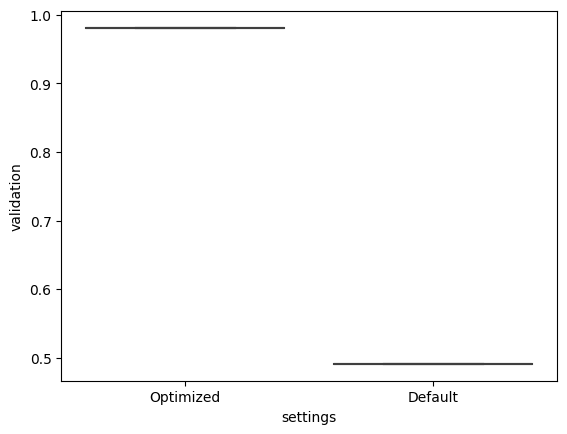

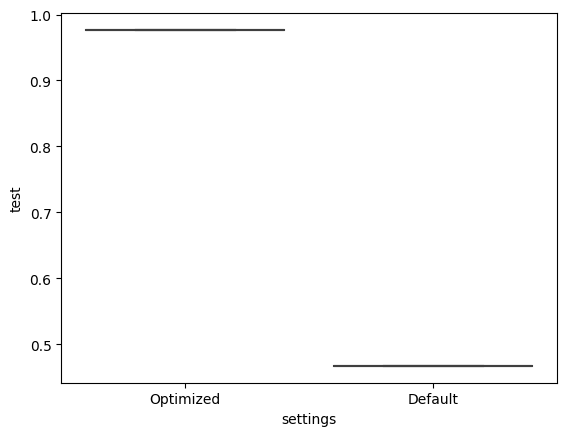

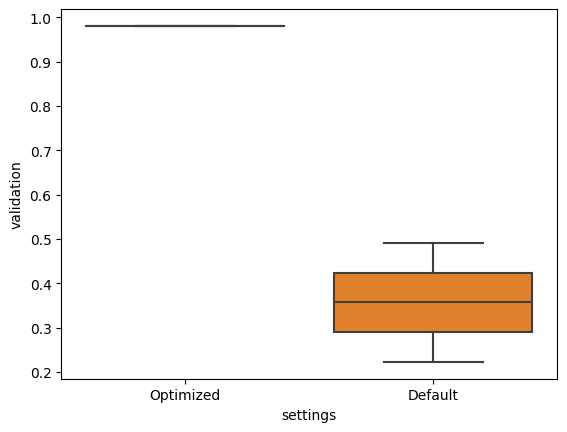

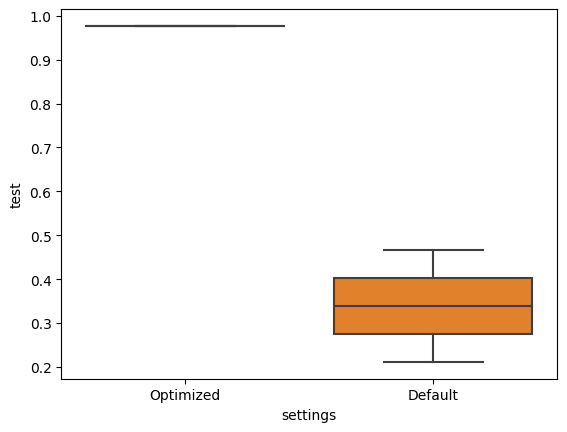

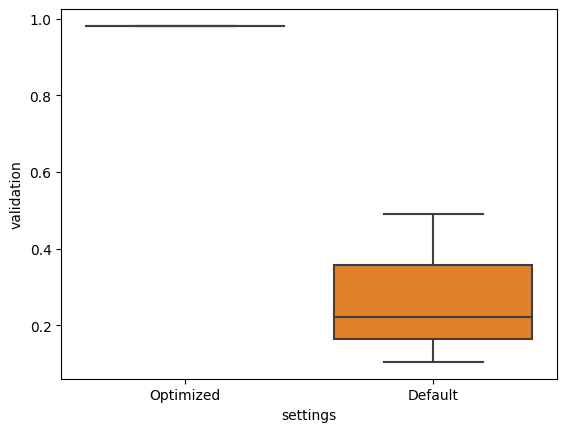

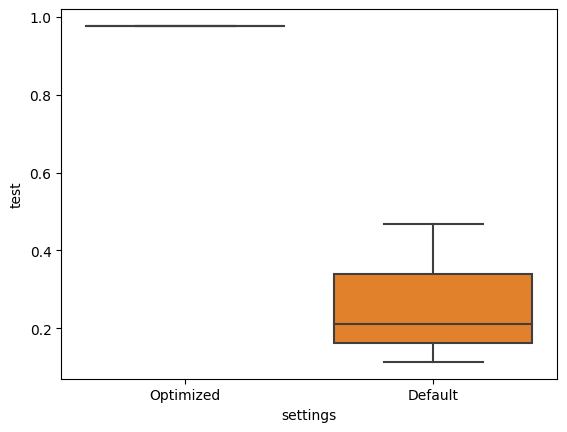

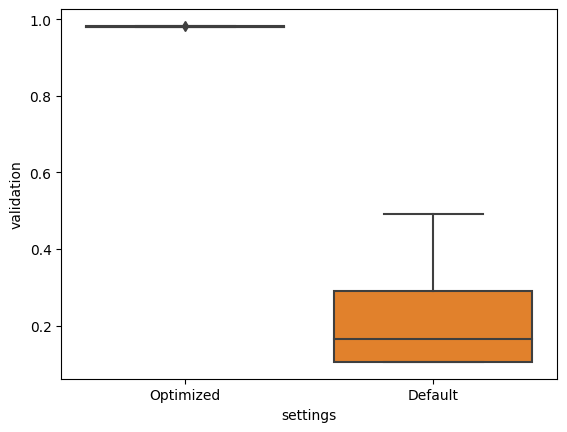

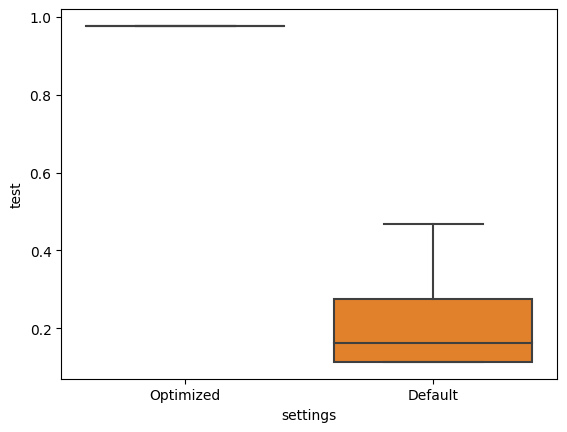

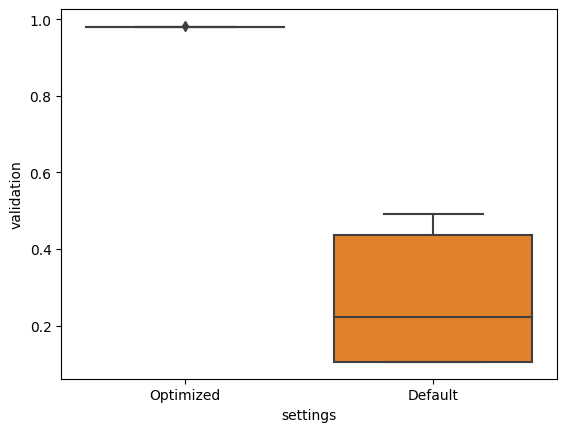

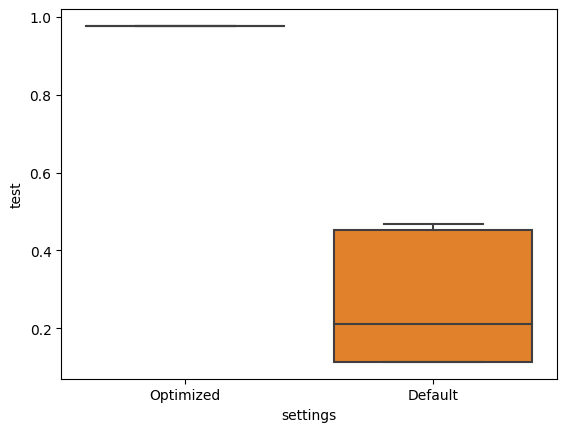

In [9]:

rep = 5
for _ in range(rep):
   
    loss_noise = 0.69287371
    activation_noise = 0.01254195
    input_noise = 0.26359106
    gradient_noise = 0.
    weight_noise = 0.
    gradient_dropout = 0.
    dropout = 0.
    drop_connect = 0.
    batch_size = 1024
    double_batch_on = 70
    drnn = 0.
    weight_std = 0.19582632
    verbose = 0
    epochs = 100

    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, callbacks, verbose=verbose)
    nn.create_model()
    nn.fit()
    
    row = ['Optimized', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    loss_noise = 0.0
    activation_noise = 0.0
    input_noise = 0.0
    gradient_noise = 0.0
    weight_noise = 0.0
    gradient_dropout = .0
    dropout = 0.0
    drop_connect = 0.0
    batch_size = len(nn.dataset.X_train)
    double_batch_on = np.inf
    drnn = 0.0
    weight_std = 0.1

    verbose = 0

    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, callbacks, verbose=verbose)
    nn.create_model()
    nn.fit()
    
    row = ['Default', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    sns.boxplot(x='settings', y='validation', data=exp_df)
    plt.show()
    
   
    sns.boxplot(x='settings', y='test', data=exp_df)
    plt.show()
    
    

    

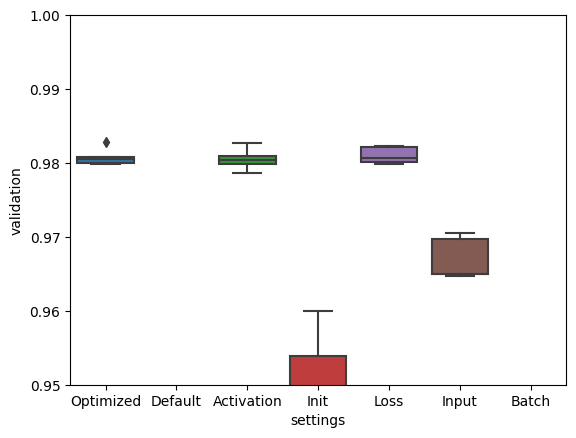

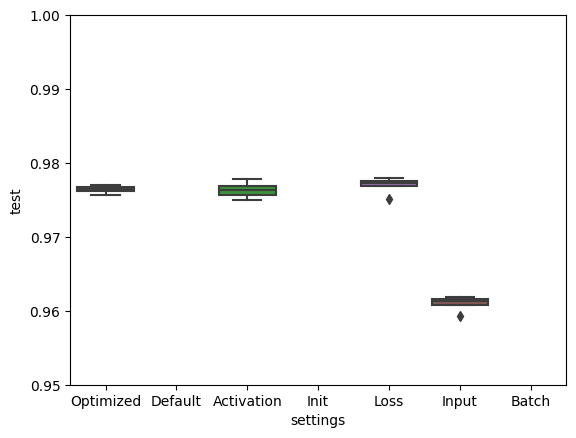

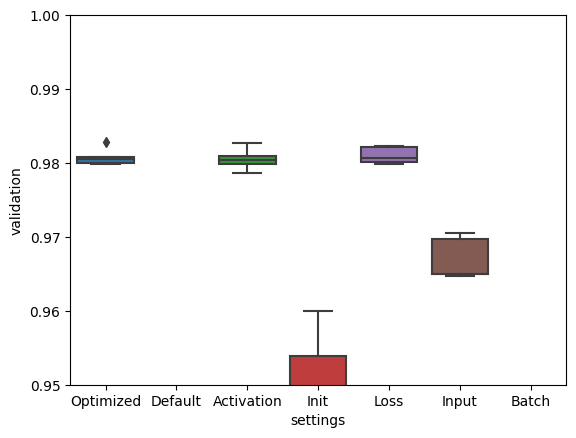

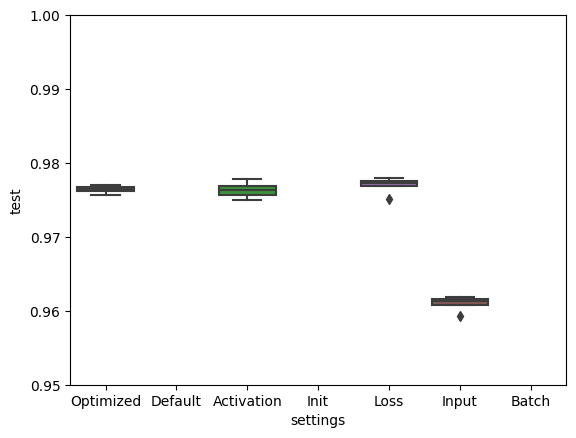

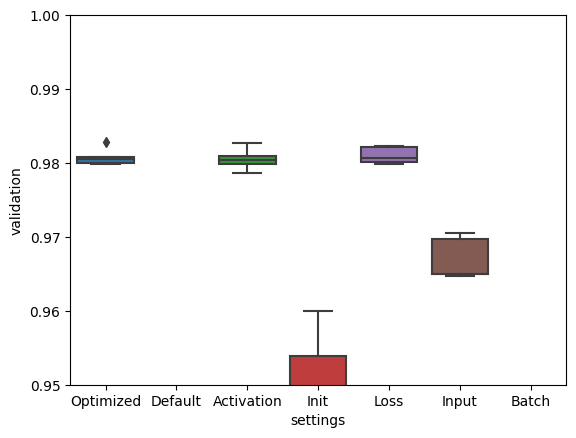

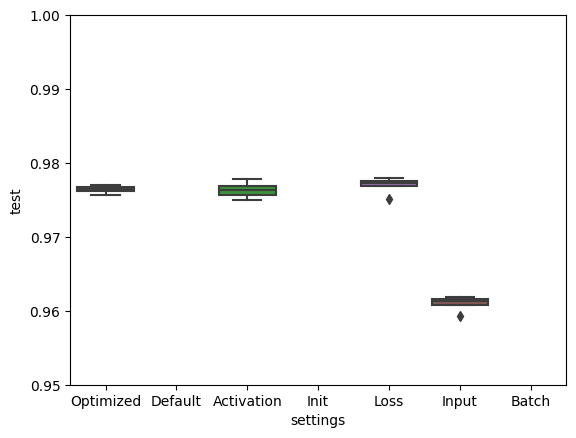

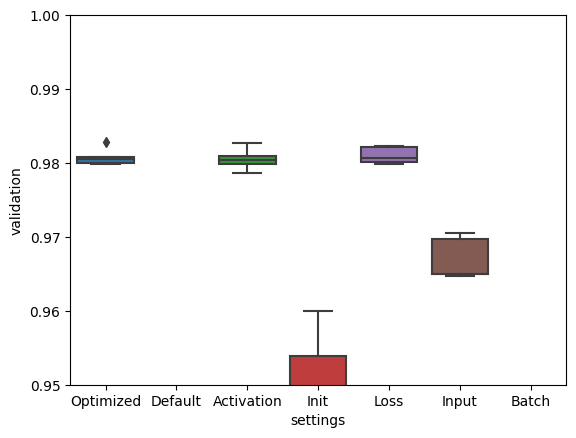

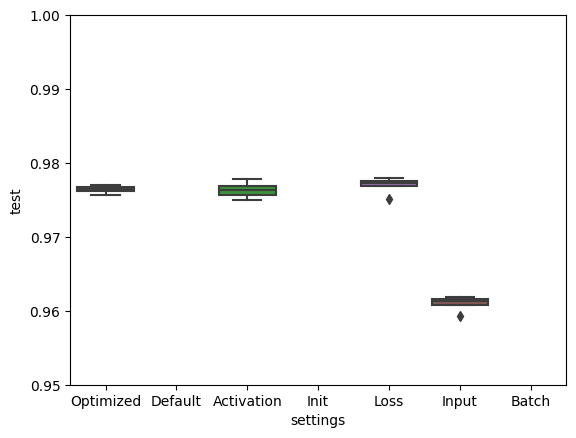

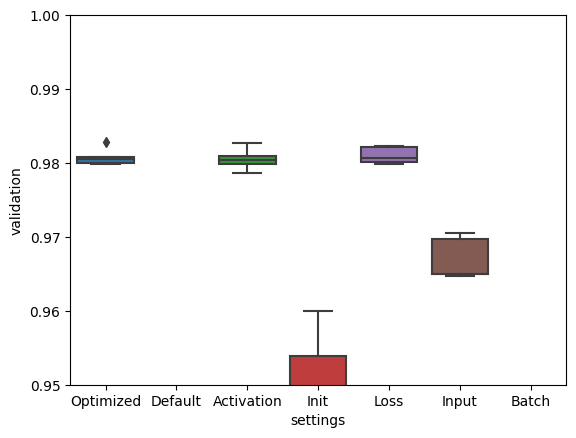

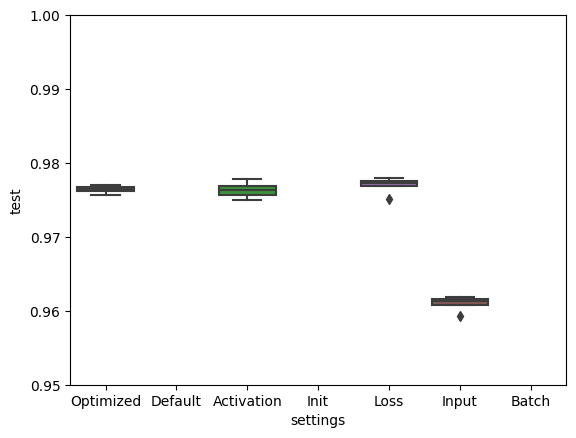

In [19]:
rep = 5
for _ in range(rep):
    loss_noise = 0.69287371
    activation_noise = 0.01254195
    input_noise = 0.26359106
    gradient_noise = 0.
    weight_noise = 0.
    gradient_dropout = 0.
    dropout = 0.
    drop_connect = 0.
    batch_size = len(nn.dataset.X_train)
    double_batch_on = 70
    drnn = 0.
    weight_std = 0.19582632
    verbose = 0
    epochs = 100
    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, gradient_dropout, dropout, 
              drop_connect, batch_size, double_batch_on, drnn, weight_std, metric, epochs, callbacks, verbose=verbose)
    nn.create_model()
    nn.fit()
    
    row = ['Batch', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    
    sns.boxplot(x='settings', y='validation', data=exp_df)
    plt.ylim(.95, 1.)

    plt.show()


    sns.boxplot(x='settings', y='test', data=exp_df)
    plt.ylim(.95, 1.)

    plt.show()

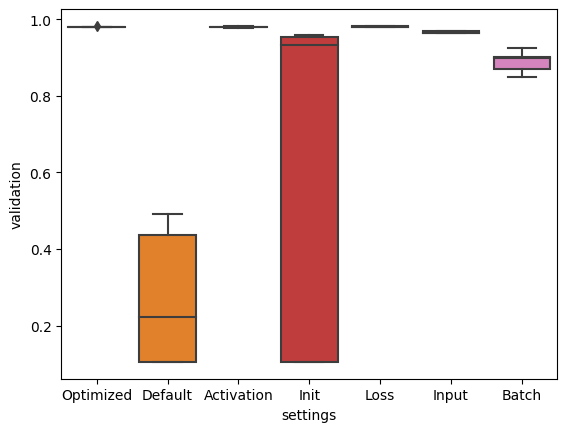

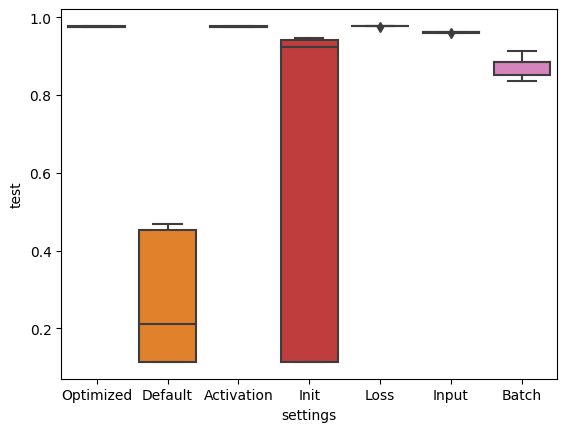

In [22]:
sns.boxplot(x='settings', y='validation', data=exp_df)
#plt.ylim(.97, .99)
plt.show()


sns.boxplot(x='settings', y='test', data=exp_df)
#plt.ylim(.97, .99)
plt.show()

In [21]:
exp_df.to_csv('mnist-fc20x50-pso.csv', index=False)

In [23]:
exp_df

,settings,validation,test,training time,inference time
0,Optimized,0.980833,0.9767,94.051877,0.813818
1,Default,0.491167,0.4671,11.170972,0.713769
2,Optimized,0.980000,0.9765,90.413857,0.804684
3,Default,0.222500,0.2115,11.151001,0.685163
4,Optimized,0.980500,0.9762,87.434515,0.796045
5,Default,0.105000,0.1135,11.140425,1.096108
6,Optimized,0.982833,0.9756,88.969182,0.752549
7,Default,0.105000,0.1135,11.288580,0.803352
8,Optimized,0.979833,0.9770,89.352855,0.800475
9,Default,0.437000,0.4531,11.254816,0.804415


In [11]:
dropout = best_dropout
gradient_noise = best_gradient_noise
batch_size = best_batch_size
activation_noise = best_activation_noise
loss_noise = best_loss_noise
input_noise = best_input_noise
verbose = 1
patience = 50

optimizer = tf.optimizers.Adam()
nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, optimizer, dropout, metric, batch_size, epochs, callbacks, verbose=verbose)
nn.create_model()
nn.fit()

Epoch 1/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.6098 - accuracy: 0.4195 - val_loss: 1.3237 - val_accuracy: 0.5236
Epoch 2/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.3217 - accuracy: 0.5266 - val_loss: 1.1226 - val_accuracy: 0.6124
Epoch 3/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.2000 - accuracy: 0.5700 - val_loss: 1.0407 - val_accuracy: 0.6414
Epoch 4/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.1323 - accuracy: 0.5980 - val_loss: 0.9778 - val_accuracy: 0.6616
Epoch 5/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.0854 - accuracy: 0.6165 - val_loss: 0.9392 - val_accuracy: 0.6724
Epoch 6/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.0450 - accuracy: 0.6310 - val_loss: 0.9147 - val_accuracy: 0.6826
Epoch 7/10000
682/682 [==============================] - 2s 3ms/step - loss: 1.0043 - accuracy: 0.6458 - val_loss: 0.9138 - val_ac

In [12]:
row = ['relu', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]

print(row)

['relu', 0.7268000245094299, 0.7124000191688538, 66.59488534927368, 0.5053403377532959]


In [13]:
print(tf.__version__)

2.8.0


In [4]:
import tensorflow as tf


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [27]:
exp_df = pd.DataFrame(columns=['settings', 'validation', 'test', 'training time', 'inference time'])



Start of epoch 0
Training acc: 0.2907
Validation acc: 0.2130
Time taken: 2.04s
Patience:  1

Start of epoch 1
Training acc: 0.2052
Validation acc: 0.2007
Time taken: 1.68s
Patience:  1

Start of epoch 2
Training acc: 0.2155
Validation acc: 0.2100
Time taken: 1.29s
Patience:  2

Start of epoch 3
Training acc: 0.2608
Validation acc: 0.3398
Time taken: 1.28s
Patience:  3

Start of epoch 4
Training acc: 0.3337
Validation acc: 0.4780
Time taken: 1.26s
Patience:  1

Start of epoch 5
Training acc: 0.3768
Validation acc: 0.5345
Time taken: 1.30s
Patience:  1

Start of epoch 6
Training acc: 0.4135
Validation acc: 0.5135
Time taken: 1.30s
Patience:  1

Start of epoch 7
Training acc: 0.4449
Validation acc: 0.5608
Time taken: 1.36s
Patience:  2

Start of epoch 8
Training acc: 0.4716
Validation acc: 0.5558
Time taken: 1.29s
Patience:  1

Start of epoch 9
Training acc: 0.5006
Validation acc: 0.6067
Time taken: 1.30s
Patience:  2

Start of epoch 10
Training acc: 0.5232
Validation acc: 0.6218
Time ta

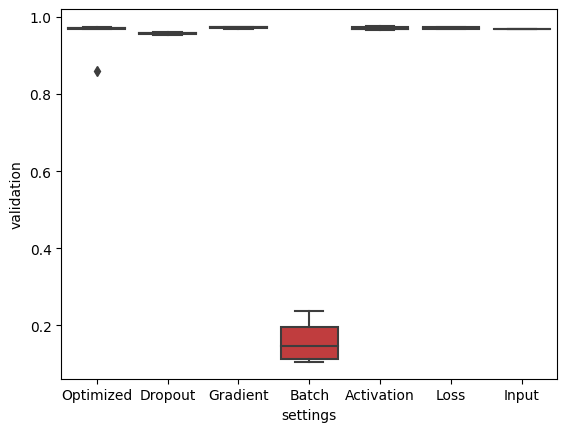

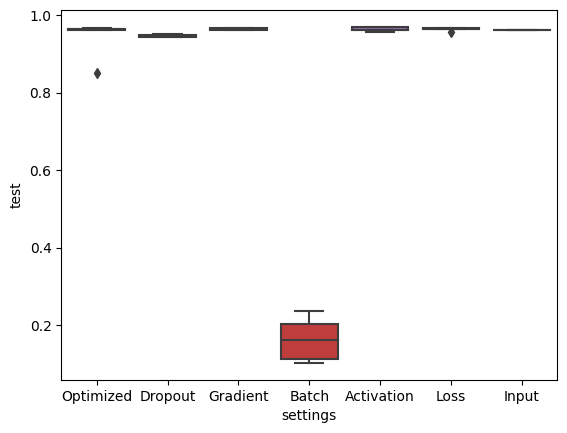


Start of epoch 0
Training acc: 0.2765
Validation acc: 0.2005
Time taken: 1.94s
Patience:  1

Start of epoch 1
Training acc: 0.2096
Validation acc: 0.2067
Time taken: 1.63s
Patience:  1

Start of epoch 2
Training acc: 0.2231
Validation acc: 0.2220
Time taken: 1.28s
Patience:  1

Start of epoch 3
Training acc: 0.2888
Validation acc: 0.3468
Time taken: 1.33s
Patience:  1

Start of epoch 4
Training acc: 0.3646
Validation acc: 0.4325
Time taken: 1.29s
Patience:  1

Start of epoch 5
Training acc: 0.4416
Validation acc: 0.5890
Time taken: 1.27s
Patience:  1

Start of epoch 6
Training acc: 0.4893
Validation acc: 0.5423
Time taken: 1.33s
Patience:  1

Start of epoch 7
Training acc: 0.5322
Validation acc: 0.5802
Time taken: 1.29s
Patience:  2

Start of epoch 8
Training acc: 0.5667
Validation acc: 0.5527
Time taken: 1.26s
Patience:  3

Start of epoch 9
Training acc: 0.6025
Validation acc: 0.6327
Time taken: 1.28s
Patience:  4

Start of epoch 10
Training acc: 0.6349
Validation acc: 0.7247
Time ta

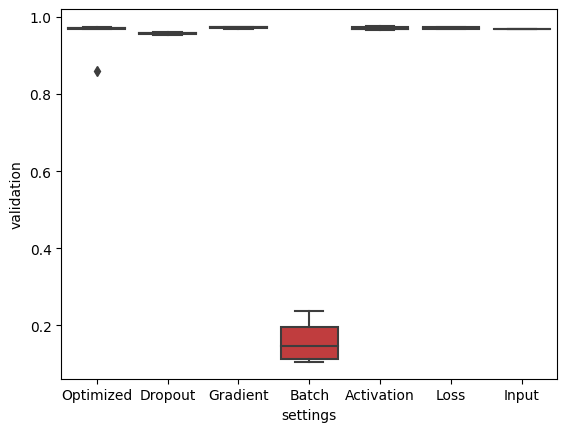

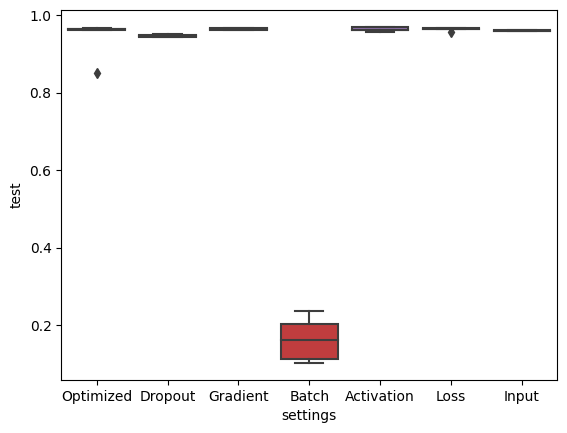


Start of epoch 0
Training acc: 0.2457
Validation acc: 0.1135
Time taken: 1.87s
Patience:  1

Start of epoch 1
Training acc: 0.1225
Validation acc: 0.2100
Time taken: 1.69s
Patience:  1

Start of epoch 2
Training acc: 0.2001
Validation acc: 0.2123
Time taken: 1.27s
Patience:  1

Start of epoch 3
Training acc: 0.2163
Validation acc: 0.2140
Time taken: 1.35s
Patience:  1

Start of epoch 4
Training acc: 0.2435
Validation acc: 0.3030
Time taken: 1.29s
Patience:  1

Start of epoch 5
Training acc: 0.2793
Validation acc: 0.3063
Time taken: 1.29s
Patience:  1

Start of epoch 6
Training acc: 0.2995
Validation acc: 0.3170
Time taken: 1.27s
Patience:  1

Start of epoch 7
Training acc: 0.3306
Validation acc: 0.4530
Time taken: 1.29s
Patience:  1

Start of epoch 8
Training acc: 0.4275
Validation acc: 0.5210
Time taken: 1.29s
Patience:  1

Start of epoch 9
Training acc: 0.5123
Validation acc: 0.5615
Time taken: 1.26s
Patience:  1

Start of epoch 10
Training acc: 0.5674
Validation acc: 0.6840
Time ta

Training acc: 0.9694
Validation acc: 0.9688
Time taken: 1.41s
Patience:  5

Start of epoch 89
Training acc: 0.9697
Validation acc: 0.9697
Time taken: 1.40s
Patience:  6

Start of epoch 90
Training acc: 0.9718
Validation acc: 0.9705
Time taken: 1.39s
Patience:  7

Start of epoch 91
Training acc: 0.9724
Validation acc: 0.9687
Time taken: 1.41s
Patience:  8

Start of epoch 92
Training acc: 0.9737
Validation acc: 0.9677
Time taken: 1.40s
Patience:  9

Start of epoch 93
Training acc: 0.9742
Validation acc: 0.9690
Time taken: 1.39s
Patience:  10


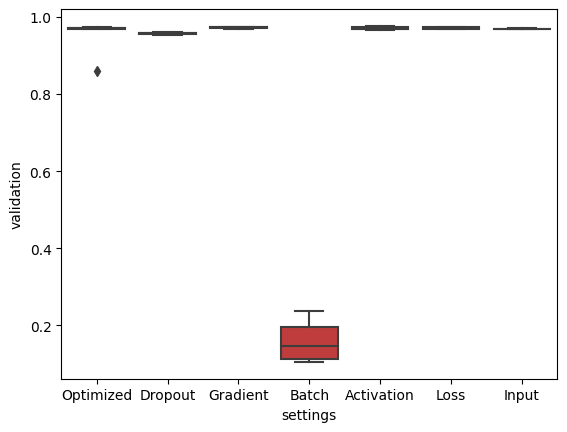

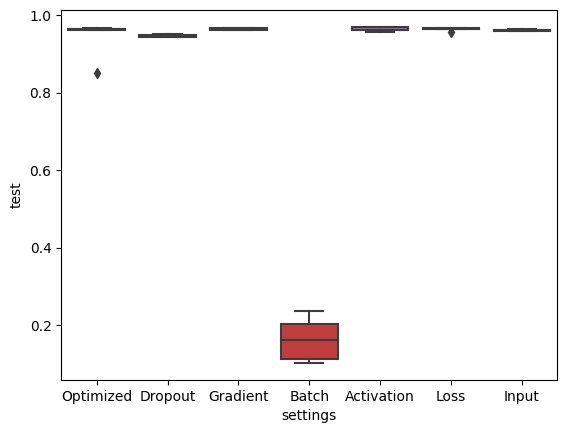


Start of epoch 0
Training acc: 0.2445
Validation acc: 0.1655
Time taken: 1.85s
Patience:  1

Start of epoch 1
Training acc: 0.2017
Validation acc: 0.1965
Time taken: 1.25s
Patience:  1

Start of epoch 2
Training acc: 0.2136
Validation acc: 0.2133
Time taken: 1.29s
Patience:  1

Start of epoch 3
Training acc: 0.2400
Validation acc: 0.3255
Time taken: 1.27s
Patience:  1

Start of epoch 4
Training acc: 0.3014
Validation acc: 0.3570
Time taken: 1.27s
Patience:  1

Start of epoch 5
Training acc: 0.3444
Validation acc: 0.4238
Time taken: 1.27s
Patience:  1

Start of epoch 6
Training acc: 0.3870
Validation acc: 0.4547
Time taken: 1.45s
Patience:  1

Start of epoch 7
Training acc: 0.4178
Validation acc: 0.4915
Time taken: 1.28s
Patience:  1

Start of epoch 8
Training acc: 0.4470
Validation acc: 0.4493
Time taken: 1.35s
Patience:  1

Start of epoch 9
Training acc: 0.4687
Validation acc: 0.5407
Time taken: 1.25s
Patience:  2

Start of epoch 10
Training acc: 0.4900
Validation acc: 0.5425
Time ta

Training acc: 0.9736
Validation acc: 0.9702
Time taken: 1.44s
Patience:  1

Start of epoch 89
Training acc: 0.9740
Validation acc: 0.9723
Time taken: 1.42s
Patience:  2

Start of epoch 90
Training acc: 0.9752
Validation acc: 0.9725
Time taken: 1.43s
Patience:  1

Start of epoch 91
Training acc: 0.9747
Validation acc: 0.9712
Time taken: 1.43s
Patience:  1

Start of epoch 92
Training acc: 0.9749
Validation acc: 0.9697
Time taken: 1.42s
Patience:  2

Start of epoch 93
Training acc: 0.9744
Validation acc: 0.9715
Time taken: 1.44s
Patience:  3

Start of epoch 94
Training acc: 0.9754
Validation acc: 0.9682
Time taken: 1.42s
Patience:  4

Start of epoch 95
Training acc: 0.9755
Validation acc: 0.9717
Time taken: 1.44s
Patience:  5

Start of epoch 96
Training acc: 0.9752
Validation acc: 0.9675
Time taken: 1.47s
Patience:  6

Start of epoch 97
Training acc: 0.9758
Validation acc: 0.9712
Time taken: 1.50s
Patience:  7

Start of epoch 98
Training acc: 0.9761
Validation acc: 0.9677
Time taken: 1.45

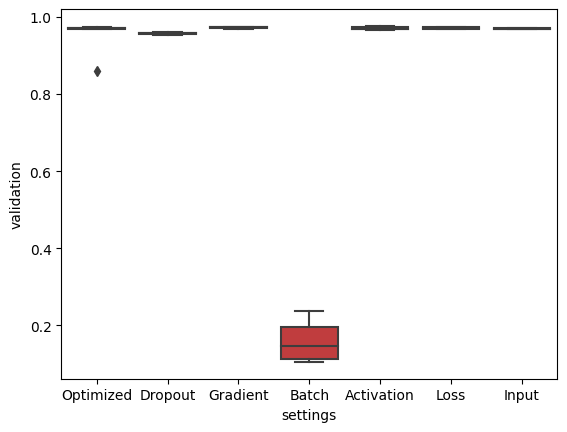

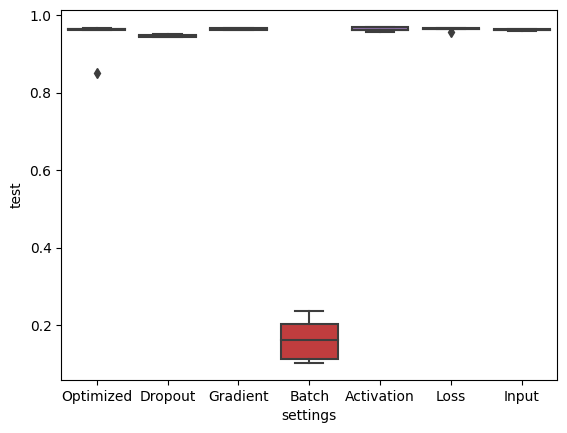


Start of epoch 0
Training acc: 0.2899
Validation acc: 0.1933
Time taken: 1.88s
Patience:  1

Start of epoch 1
Training acc: 0.2059
Validation acc: 0.1997
Time taken: 1.31s
Patience:  1

Start of epoch 2
Training acc: 0.2170
Validation acc: 0.2345
Time taken: 1.66s
Patience:  1

Start of epoch 3
Training acc: 0.2460
Validation acc: 0.3053
Time taken: 1.24s
Patience:  1

Start of epoch 4
Training acc: 0.2965
Validation acc: 0.3517
Time taken: 1.25s
Patience:  1

Start of epoch 5
Training acc: 0.3572
Validation acc: 0.4127
Time taken: 1.28s
Patience:  1

Start of epoch 6
Training acc: 0.4191
Validation acc: 0.5402
Time taken: 1.26s
Patience:  1

Start of epoch 7
Training acc: 0.4517
Validation acc: 0.5495
Time taken: 1.27s
Patience:  1

Start of epoch 8
Training acc: 0.4780
Validation acc: 0.5635
Time taken: 1.27s
Patience:  1

Start of epoch 9
Training acc: 0.5035
Validation acc: 0.6013
Time taken: 1.26s
Patience:  1

Start of epoch 10
Training acc: 0.5264
Validation acc: 0.6147
Time ta

Training acc: 0.9710
Validation acc: 0.9705
Time taken: 1.43s
Patience:  9

Start of epoch 89
Training acc: 0.9726
Validation acc: 0.9725
Time taken: 1.41s
Patience:  10


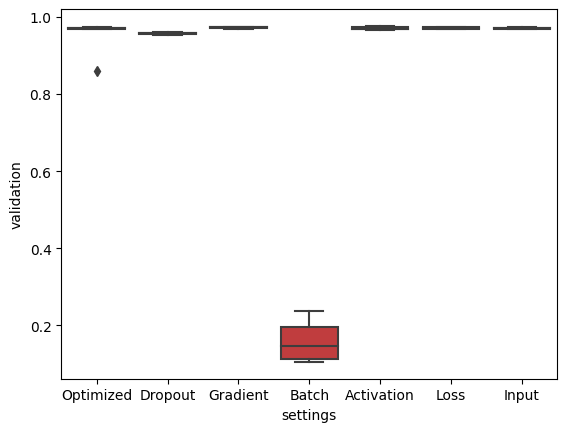

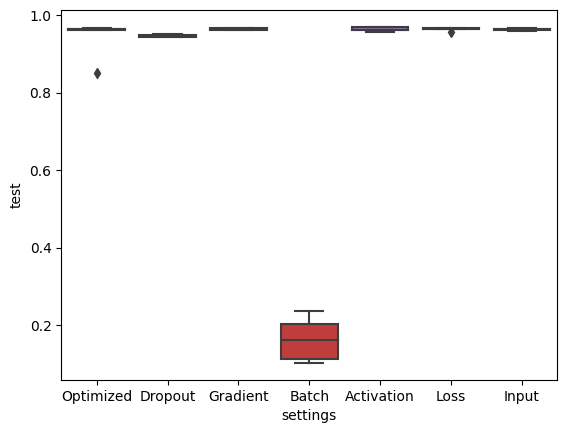

In [39]:

rep = 5
for _ in range(rep):
    dropout = best_dropout
    gradient_noise = best_gradient_noise
    batch_size = best_batch_size
    activation_noise = best_activation_noise
    loss_noise = best_loss_noise
    input_noise = 0.0
    verbose = 1
    patience = 10

    optimizer = tf.optimizers.Adam()
    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, optimizer, dropout, metric, batch_size, epochs, patience, verbose=verbose)
    nn.create_model()
    nn.fit()
    
    row = ['Input', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
   
    
    sns.boxplot(x='settings', y='validation', data=exp_df)
    plt.show()
    
   
    sns.boxplot(x='settings', y='test', data=exp_df)
    plt.show()
    
    

    

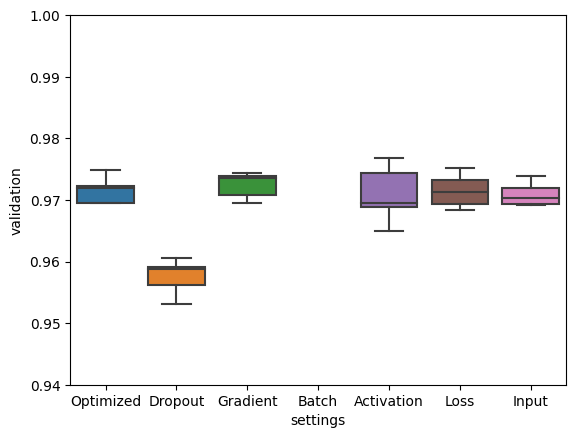

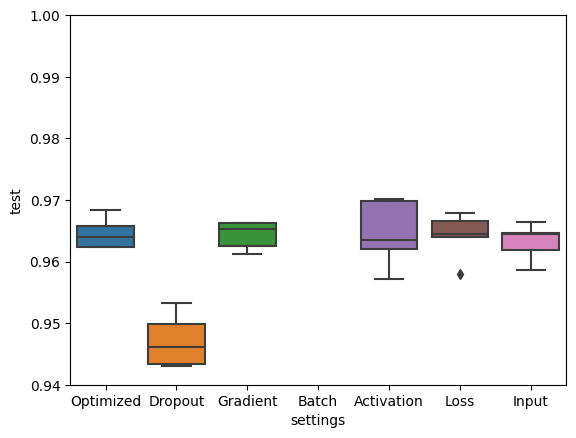

In [40]:
sns.boxplot(x='settings', y='validation', data=exp_df)
plt.ylim(0.94,1.0)
plt.show()


sns.boxplot(x='settings', y='test', data=exp_df)
plt.ylim(0.94,1.0)

plt.show()

In [7]:
import tensorflow as tf

import tensorflow.keras

ImportError: DLL load failed while importing _pywrap_dtensor_device: The specified procedure could not be found.

In [15]:
### imports
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

### constant data
x  = [[0.,0.],[1.,1.],[1.,0.],[0.,1.]]
y_ = [[1.,0.],[1.,0.],[0.,1.],[0.,1.]]

### induction

# Layer 0 = the x2 inputs
x0 = tf.constant( x  , dtype=tf.float32 )
y0 = tf.constant( y_ , dtype=tf.float32 )

keep_prob = tf.placeholder( dtype=tf.float32 )

# Layer 1 = the 2x12 hidden sigmoid
m1 = tf.Variable( tf.random_uniform( [2,12] , minval=0.1 , maxval=0.9 , dtype=tf.float32  ))
b1 = tf.Variable( tf.random_uniform( [12]   , minval=0.1 , maxval=0.9 , dtype=tf.float32  ))


########## DROP CONNECT
# - use this to preform "DropConnect" flavor of dropout
dropConnect = tf.nn.dropout( m1, keep_prob ) * keep_prob
h1 = tf.sigmoid( tf.matmul( x0, dropConnect ) + b1 ) 

########## DROP OUT
# - uncomment this to use "regular" dropout
#h1 = tf.nn.dropout( tf.sigmoid( tf.matmul( x0,m1 ) + b1 ) , keep_prob )


# Layer 2 = the 12x2 softmax output
m2 = tf.Variable( tf.random_uniform( [12,2] , minval=0.1 , maxval=0.9 , dtype=tf.float32  ))
b2 = tf.Variable( tf.random_uniform( [2]   , minval=0.1 , maxval=0.9 , dtype=tf.float32  ))
y_out = tf.nn.softmax( tf.matmul( h1,m2 ) + b2 )


# loss : sum of the squares of y0 - y_out
loss = tf.reduce_sum( tf.square( y0 - y_out ) )

# training step : discovered learning rate of 1e-2 through experimentation
train = tf.train.AdamOptimizer(1e-2).minimize(loss)

### training
# run 5000 times using all the X and Y
# print out the loss and any other interesting info
with tf.Session() as sess:
  sess.run( tf.initialize_all_variables() )
  print ("\nloss")
  for step in range(5000) :
    sess.run(train,feed_dict={keep_prob:0.5})
    if (step + 1) % 100 == 0 :
      print (sess.run(loss,feed_dict={keep_prob:1.}))
      labels  = "m1,b1,m2,b2,y_out,loss".split(",")
      for label,result in zip(*(labels,results)) :
        print (label)
        print (result)


  results = sess.run([m1,b1,m2,b2,y_out,loss],feed_dict={keep_prob:1.})
  labels  = "m1,b1,m2,b2,y_out,loss".split(",")
  for label,result in zip(*(labels,results)) :
    print (label)
    print (result)




loss
1.9690294
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
1.8865726
m1
[[ 6.843524   2.4986339  6.789671   9.562

0.3401897
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
0.35250795
m1
[[ 6.843524   2.4986339  6.789671   9.562688  

0.17187622
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
0.21047518
m1
[[ 6.843524   2.4986339  6.789671   9.562688 

0.15543136
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
0.16729191
m1
[[ 6.843524   2.4986339  6.789671   9.562688 

0.11529912
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
0.22568788
m1
[[ 6.843524   2.4986339  6.789671   9.562688 

0.15534408
m1
[[ 6.843524   2.4986339  6.789671   9.562688   3.117555   9.102583
   9.460992  -4.291042  -3.9401336  3.0425773  7.234787   6.512954 ]
 [ 6.900377   2.8717883  6.893082  -4.0344825  3.4294734 -3.6253073
  -3.9141746 10.334141   9.794676   3.2445426  6.616902   6.081915 ]]
b1
[ 0.7428396  -4.693986    0.6073123   2.110055   -6.1831493   1.8604554
  2.0828145   1.794241    1.7594404  -5.653988    0.47375956  0.44020918]
m2
[[-0.10829917  1.7133363 ]
 [ 2.5076628  -1.2915853 ]
 [-0.7059002   1.3178955 ]
 [ 1.5656083  -0.08561096]
 [ 3.788629   -2.8045454 ]
 [ 1.1272024  -0.36755863]
 [ 1.3256636  -0.34395236]
 [ 1.5372744  -0.55563515]
 [ 1.4676094  -0.4169851 ]
 [ 2.9389615  -1.9931349 ]
 [-0.42485857  1.5144848 ]
 [-0.7131217   1.5894574 ]]
b2
[-0.04462273  1.4007479 ]
y_out
[[7.5606090e-01 2.4393913e-01]
 [9.9986148e-01 1.3848775e-04]
 [3.3848271e-02 9.6615177e-01]
 [2.7666967e-02 9.7233307e-01]]
loss
0.12283495
0.1303976
m1
[[ 6.843524   2.4986339  6.789671   9.562688  

In [6]:
exp_df = pd.DataFrame(columns=['settings', 'validation', 'test', 'training time', 'inference time'])


cuurent batch: 32

Start of epoch 0
Training acc: 0.8857
Validation acc: 0.9795
Time taken: 3.80s
Patience:  1
cuurent batch: 32

Start of epoch 1
Training acc: 0.9476
Validation acc: 0.9813
Time taken: 3.38s
Patience:  1
cuurent batch: 32

Start of epoch 2
Training acc: 0.9583
Validation acc: 0.9817
Time taken: 3.80s
Patience:  1
cuurent batch: 32

Start of epoch 3
Training acc: 0.9609
Validation acc: 0.9855
Time taken: 3.65s
Patience:  1
cuurent batch: 32

Start of epoch 4
Training acc: 0.9629
Validation acc: 0.9858
Time taken: 3.65s
Patience:  1
cuurent batch: 32

Start of epoch 5
Training acc: 0.9636
Validation acc: 0.9872
Time taken: 3.77s
Patience:  1
cuurent batch: 32

Start of epoch 6
Training acc: 0.9660
Validation acc: 0.9817
Time taken: 3.69s
Patience:  1
cuurent batch: 36

Start of epoch 7
Training acc: 0.9671
Validation acc: 0.9867
Time taken: 3.35s
Patience:  2
cuurent batch: 40

Start of epoch 8
Training acc: 0.9682
Validation acc: 0.9863
Time taken: 2.84s
Patience:  3
c

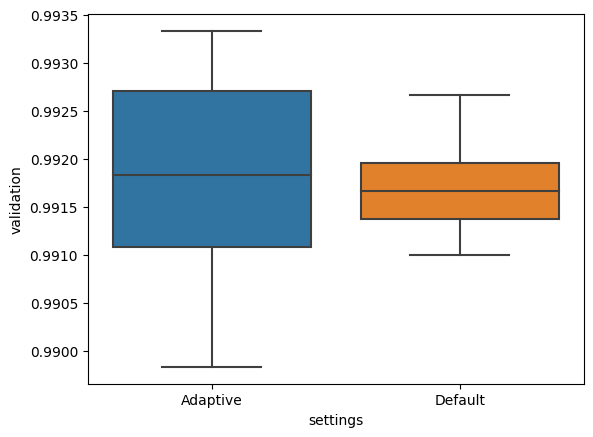

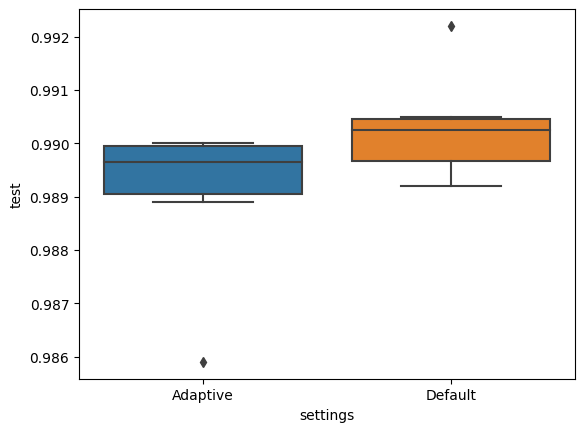

cuurent batch: 32

Start of epoch 0
Training acc: 0.2481
Validation acc: 0.1050
Time taken: 3.75s
Patience:  1
cuurent batch: 32

Start of epoch 1
Training acc: 0.1092
Validation acc: 0.1050
Time taken: 3.64s
Patience:  1
cuurent batch: 36

Start of epoch 2
Training acc: 0.1065
Validation acc: 0.1050
Time taken: 3.11s
Patience:  2
cuurent batch: 40

Start of epoch 3
Training acc: 0.1065
Validation acc: 0.1050
Time taken: 2.84s
Patience:  3
cuurent batch: 44

Start of epoch 4
Training acc: 0.1068
Validation acc: 0.1113
Time taken: 2.72s
Patience:  4
cuurent batch: 32

Start of epoch 5
Training acc: 0.1063
Validation acc: 0.1000
Time taken: 3.44s
Patience:  1
cuurent batch: 36

Start of epoch 6
Training acc: 0.1073
Validation acc: 0.1050
Time taken: 3.03s
Patience:  2
cuurent batch: 40

Start of epoch 7
Training acc: 0.1068
Validation acc: 0.1050
Time taken: 2.91s
Patience:  3
cuurent batch: 44

Start of epoch 8
Training acc: 0.1070
Validation acc: 0.1050
Time taken: 2.69s
Patience:  4
c

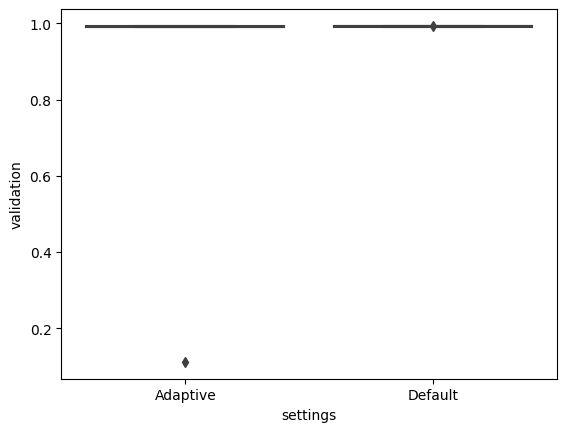

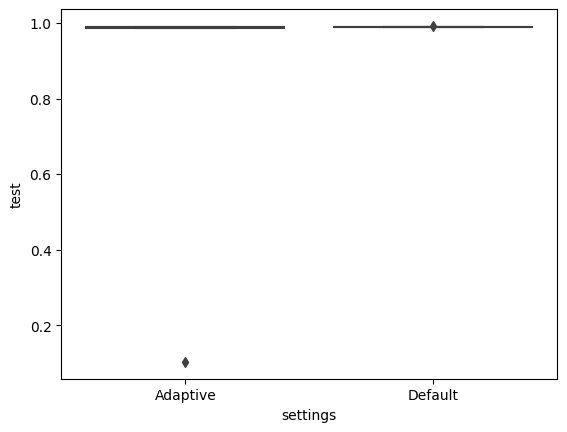

cuurent batch: 32

Start of epoch 0
Training acc: 0.9132
Validation acc: 0.9785
Time taken: 3.55s
Patience:  1
cuurent batch: 32

Start of epoch 1
Training acc: 0.9569
Validation acc: 0.9833
Time taken: 3.66s
Patience:  1
cuurent batch: 32

Start of epoch 2
Training acc: 0.9648
Validation acc: 0.9858
Time taken: 3.57s
Patience:  1
cuurent batch: 32

Start of epoch 3
Training acc: 0.9707
Validation acc: 0.9885
Time taken: 3.66s
Patience:  1
cuurent batch: 32

Start of epoch 4
Training acc: 0.9735
Validation acc: 0.9868
Time taken: 3.67s
Patience:  1
cuurent batch: 36

Start of epoch 5
Training acc: 0.9752
Validation acc: 0.9883
Time taken: 3.19s
Patience:  2
cuurent batch: 40

Start of epoch 6
Training acc: 0.9754
Validation acc: 0.9903
Time taken: 2.94s
Patience:  3
cuurent batch: 32

Start of epoch 7
Training acc: 0.9775
Validation acc: 0.9913
Time taken: 3.65s
Patience:  1
cuurent batch: 32

Start of epoch 8
Training acc: 0.9776
Validation acc: 0.9883
Time taken: 3.61s
Patience:  1
c

KeyboardInterrupt: 

In [8]:

rep = 5
for _ in range(rep):
    dropout = 0.4
    gradient_noise = 0.0
    loss_noise = 0.0
    activation_noise = 0.0
    input_noise = 0.0
    batch_size = 32
    weight_noise = 0.0
    verbose = 1
    patience = 10

    optimizer = tf.optimizers.Adam()
    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, optimizer, dropout, metric, batch_size, epochs, patience, verbose=verbose)
    nn.adaptive_batch = True
    nn.create_model()
    nn.fit()
    
    row = ['Adaptive', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    dropout = 0.4
    gradient_noise = 0.0
    loss_noise = 0.0
    activation_noise = 0.0
    input_noise = 0.0
    batch_size = 32
    weight_noise = 0.0
    verbose = 1
    patience = 10

    optimizer = tf.optimizers.Adam()
    nn.set_config(loss_noise, activation_noise, input_noise, gradient_noise, weight_noise, optimizer, dropout, metric, batch_size, epochs, patience, verbose=verbose)
    nn.adaptive_batch = False
    nn.create_model()
    nn.fit()
    
    row = ['Default', nn.val_score, nn.test_score, nn.training_time, nn.inference_time]
    exp_df.loc[len(exp_df)] = row
    
    sns.boxplot(x='settings', y='validation', data=exp_df)
    plt.show()
    
   
    sns.boxplot(x='settings', y='test', data=exp_df)
    plt.show()
    
    

    